# RATIO 2019 - Benchmarking Workshop

https://gluon-nlp.mxnet.io/install.html

```
pip install --upgrade 'mxnet>=1.3.0'
pip install gluonnlp
wget https://gluon-nlp.mxnet.io/_downloads/sentence_embedding.zip
unzip sentence_embedding.zip
ln -s sentence_embedding/bert bert
```

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from mxboard import SummaryWriter

from sklearn import utils
from tqdm import tqdm

In [2]:
%matplotlib inline

In [3]:
from utils_data import Timer

# --------------------------------

from utils_data import configure_logging
configure_logging()

# --------------------------------

# set repeatable random state
from utils_data import init_random
init_random()

# --------------------------------

# make tqdm jupyter friendly
from tqdm import tqdm_notebook as tqdm

# apply progress bars for pandas .apply() -> .progress_apply()
# for .progress_apply() we have to hack it like this?
tqdm().pandas()

# Task : Same Side Classification

In [4]:
# paths in utils_data.py

data_cross_path = 'data/same-side-classification/cross-topic/{}.csv'
data_within_path = 'data/same-side-classification/within-topic/{}.csv'
new_within_test = 'data/same-side-classification/within-topic/within_test.csv'
fn_art_eval = "data/artificial_evalset/artificial_evalset.tsv"

# from utils_data import names_columns_X, names_columns_X_arteval, names_columns_y

### Load within-topics / cross-topics data - distinct train dev sets - artifical evalset data

In [5]:
from utils_data import load_and_prepare_official_data
from utils_data import load_distinct_df_raw, load_distinct_data
from utils_data import load_artificial_dataset

cross_traindev_df, cross_test_df = load_and_prepare_official_data("cross")
within_traindev_df, within_test_df = load_and_prepare_official_data("within")

distinct_cross_train_df, distinct_cross_dev_df = load_distinct_df_raw("cross")
distinct_within_train_df, distinct_within_dev_df = load_distinct_df_raw("within")

artificial_evalset_df = load_artificial_dataset()

Start on [read S3C cross train/dev] ...
Time for [read S3C cross train/dev]: 0:00:00.868659
Start on [tag cross train/dev] ...



Time for [tag cross train/dev]: 0:00:37.083706
Start on [read S3C within train/dev] ...
Time for [read S3C within train/dev]: 0:00:01.216661
Start on [tag within train/dev] ...



Time for [tag within train/dev]: 0:00:52.351022
Start on [tag distinct cross train/dev] ...



Time for [tag distinct cross train/dev]: 0:00:33.804329
Start on [tag distinct within train/dev] ...



Time for [tag distinct within train/dev]: 0:00:12.722429
Start on [read artificial evalset] ...
Time for [read artificial evalset]: 0:00:00.258056
Start on [tag artificial evalset] ...



Time for [tag artificial evalset]: 0:00:00.109695


### Get an overview about each dataset

In [6]:
stats = True

In [7]:
if stats:
    from utils_data import add_bert_tokens, add_sentence_segments

    cross_traindev_df = add_bert_tokens(cross_traindev_df)
    within_traindev_df = add_bert_tokens(within_traindev_df)
    cross_test_df = add_bert_tokens(cross_test_df)
    within_test_df = add_bert_tokens(within_test_df)
    
    cross_traindev_df = add_sentence_segments(cross_traindev_df)
    within_traindev_df = add_sentence_segments(within_traindev_df)
    cross_test_df = add_sentence_segments(cross_test_df)
    within_test_df = add_sentence_segments(within_test_df)
    
    import pickle

    with open("data/same-side-classification/cross_traindev_df_stats.p", "wb") as fp:
        pickle.dump(cross_traindev_df, fp, pickle.HIGHEST_PROTOCOL)
    with open("data/same-side-classification/within_traindev_df_stats.p", "wb") as fp:
        pickle.dump(within_traindev_df, fp, pickle.HIGHEST_PROTOCOL)
    with open("data/same-side-classification/cross_test_df_stats.p", "wb") as fp:
        pickle.dump(cross_test_df, fp, pickle.HIGHEST_PROTOCOL)
    with open("data/same-side-classification/within_test_df_stats.p", "wb") as fp:
        pickle.dump(within_test_df, fp, pickle.HIGHEST_PROTOCOL)

In [8]:
if stats:
    from utils_data import add_bert_tokens, add_sentence_segments
    
    artificial_evalset_df = add_bert_tokens(artificial_evalset_df)
    artificial_evalset_df = add_sentence_segments(artificial_evalset_df)
    
    import pickle

    with open("data/same-side-classification/arteval_test_df_stats.p", "wb") as fp:
        pickle.dump(artificial_evalset_df, fp, pickle.HIGHEST_PROTOCOL)

Task:  same-side
within_traindev_df

Total instances:  63903 

For each topic:
abortion :  40840  instances

		Unique argument1: 7107
		Unique argument2: 7068
		Unique total arguments: 9192 

		 False :  20006  instances
		 True :  20834  instances
gay marriage :  23063  instances

		Unique argument1: 3406
		Unique argument2: 3392
		Unique total arguments: 4391 

		 False :  9786  instances
		 True :  13277  instances


For each class value:
False :  29792  instances
		Unique argument1: 9445
		Unique argument2: 9127
		Unique total arguments: 12938 

True :  34111  instances
		Unique argument1: 7660
		Unique argument2: 7645
		Unique total arguments: 11891 



Unique argument1: 10508
Unique argument2: 10453
Unique total arguments: 13574 

---------------------------------------- 

Words:
	shortest argument: 3  words
	longest argument: 2964  words
	argument average length: 235.68447490728136  words
Task:  same-side
cross_traindev_df

Total instances:  61048 

For each topic:
abortion :  6

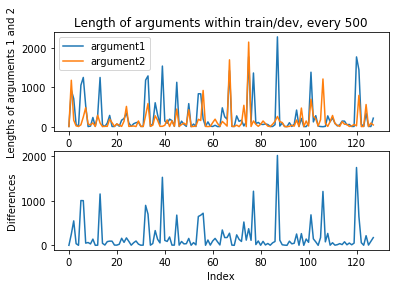

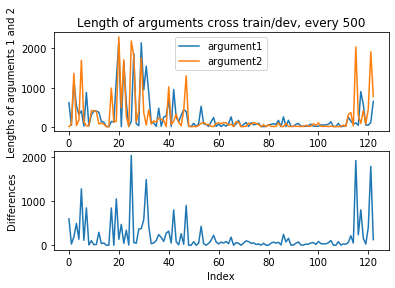

In [6]:
if stats:
    import pickle

    with open("data/same-side-classification/cross_traindev_df_stats.p", "rb") as fp:
        cross_traindev_df = pickle.load(fp)
    with open("data/same-side-classification/within_traindev_df_stats.p", "rb") as fp:
        within_traindev_df = pickle.load(fp)
    with open("data/same-side-classification/cross_test_df_stats.p", "rb") as fp:
        cross_test_df = pickle.load(fp)
    with open("data/same-side-classification/within_test_df_stats.p", "rb") as fp:
        within_test_df = pickle.load(fp)

    pass

    from utils_data import get_overview, plot_lengths

    get_overview(within_traindev_df, description="within_traindev_df")
    get_overview(cross_traindev_df, description="cross_traindev_df")
    
    print()
    print(within_traindev_df.describe())
    print(cross_traindev_df.describe())
    
    plot_lengths(within_traindev_df, slice(None, None, 500), title='Length of arguments within train/dev, every 500')
    plot_lengths(cross_traindev_df, slice(None, None, 500), title='Length of arguments cross train/dev, every 500')

In [16]:
cross_traindev_df.describe(percentiles=[.75, .85, .90])

,argument1_len,argument2_len,argument12_len_sum,argument12_len_sum_half,argument12_len_diff,argument12_len_diff_abs,argument1_sent_num,argument2_sent_num,argument12_sent_num_sum,argument12_sent_num_sum_half,argument12_sent_num_diff,argument12_sent_num_diff_abs
count,61048.000000,61048.000000,61048.000000,61048.000000,61048.000000,61048.000000,61048.000000,61048.000000,61048.000000,61048.000000,61048.000000,61048.00000
mean,264.863337,228.493382,493.356719,246.678360,36.369955,199.451563,10.888285,9.469139,20.357424,10.178712,1.419146,8.05933
std,438.187823,405.800206,750.101186,375.050593,388.217671,335.043546,17.874152,16.260619,30.214838,15.107419,15.964010,13.85315
min,3.000000,4.000000,8.000000,4.000000,-2837.000000,0.000000,1.000000,1.000000,2.000000,1.000000,-146.000000,0.00000
50%,83.000000,72.000000,162.000000,81.000000,3.000000,71.000000,3.000000,3.000000,7.000000,3.500000,0.000000,3.00000
75%,258.000000,197.000000,538.000000,269.000000,88.000000,199.000000,11.000000,8.000000,22.000000,11.000000,3.000000,8.00000
85%,544.000000,429.000000,1051.000000,525.500000,200.000000,385.000000,23.000000,18.000000,44.000000,22.000000,8.000000,16.00000
90%,844.000000,687.000000,1535.000000,767.500000,342.000000,567.000000,34.000000,28.000000,61.300000,30.650000,14.000000,24.00000
max,2964.000000,2964.000000,5789.000000,2894.500000,2926.000000,2926.000000,151.000000,151.000000,292.000000,146.000000,130.000000,146.00000


In [21]:
within_traindev_df.describe(percentiles=[.75, .85, .90])

,argument1_len,argument2_len,argument12_len_sum,argument12_len_sum_half,argument12_len_diff,argument12_len_diff_abs,argument1_sent_num,argument2_sent_num,argument12_sent_num_sum,argument12_sent_num_sum_half,argument12_sent_num_diff,argument12_sent_num_diff_abs
count,63903.000000,63903.000000,63903.000000,63903.000000,63903.000000,63903.000000,63903.000000,63903.000000,63903.000000,63903.000000,63903.000000,63903.000000
mean,252.189647,219.179303,471.368950,235.684475,33.010344,190.980486,10.460307,9.186079,19.646386,9.823193,1.274228,7.758337
std,425.471105,393.925258,730.211134,365.105567,373.091463,322.199974,17.225524,15.812931,29.325628,14.662814,15.282098,13.227754
min,3.000000,4.000000,8.000000,4.000000,-2837.000000,0.000000,1.000000,1.000000,2.000000,1.000000,-143.000000,0.000000
50%,85.000000,73.000000,164.000000,82.000000,2.000000,75.000000,4.000000,3.000000,7.000000,3.500000,0.000000,3.000000
75%,222.000000,179.000000,469.000000,234.500000,91.000000,178.000000,9.000000,8.000000,20.000000,10.000000,4.000000,7.000000
85%,509.000000,407.000000,986.000000,493.000000,176.700000,351.000000,21.000000,16.000000,41.000000,20.500000,7.000000,14.000000
90%,806.000000,653.000000,1470.000000,735.000000,304.000000,536.000000,32.000000,26.000000,58.000000,29.000000,12.000000,22.000000
max,2825.000000,2964.000000,4998.000000,2499.000000,2724.000000,2837.000000,151.000000,148.000000,292.000000,146.000000,129.000000,143.000000


In [9]:
within_traindev_df.describe()

,argument1_len,argument2_len,argument12_len_sum,argument12_len_sum_half,argument12_len_diff,argument12_len_diff_abs,argument1_sent_num,argument2_sent_num,argument12_sent_num_sum,argument12_sent_num_sum_half,argument12_sent_num_diff,argument12_sent_num_diff_abs
count,63903.000000,63903.000000,63903.000000,63903.000000,63903.000000,63903.000000,63903.000000,63903.000000,63903.000000,63903.000000,63903.000000,63903.000000
mean,252.189647,219.179303,471.368950,235.684475,33.010344,190.980486,10.460307,9.186079,19.646386,9.823193,1.274228,7.758337
std,425.471105,393.925258,730.211134,365.105567,373.091463,322.199974,17.225524,15.812931,29.325628,14.662814,15.282098,13.227754
min,3.000000,4.000000,8.000000,4.000000,-2837.000000,0.000000,1.000000,1.000000,2.000000,1.000000,-143.000000,0.000000
25%,15.000000,14.000000,80.000000,40.000000,-58.000000,23.000000,1.000000,1.000000,4.000000,2.000000,-2.000000,1.000000
50%,85.000000,73.000000,164.000000,82.000000,2.000000,75.000000,4.000000,3.000000,7.000000,3.500000,0.000000,3.000000
75%,222.000000,179.000000,469.000000,234.500000,91.000000,178.000000,9.000000,8.000000,20.000000,10.000000,4.000000,7.000000
max,2825.000000,2964.000000,4998.000000,2499.000000,2724.000000,2837.000000,151.000000,148.000000,292.000000,146.000000,129.000000,143.000000


In [20]:
for v, sdf in within_traindev_df.groupby("tag"):
    print(v, "\n", "#" * 40, "\n", sdf.describe(percentiles=[.75, .80, .85, .90]), "\n\n")

abortion 
 ######################################## 
        argument1_len  argument2_len  argument12_len_sum  \
count   40840.000000   40840.000000        40840.000000   
mean      264.362659     227.446572          491.809231   
std       437.414485     404.893154          749.603628   
min         3.000000       4.000000            8.000000   
50%        83.000000      71.000000          161.000000   
75%       258.000000     195.000000          537.000000   
80%       372.000000     289.000000          746.000000   
85%       541.150000     429.000000         1043.000000   
90%       845.000000     680.000000         1528.000000   
max      2825.000000    2964.000000         4998.000000   

       argument12_len_sum_half  argument12_len_diff  argument12_len_diff_abs  \
count             40840.000000         40840.000000             40840.000000   
mean                245.904616            36.916087               198.034794   
std                 374.801814           385.531056     

In [ ]:
if stats:
    from utils_data import get_overview, plot_lengths

    get_overview(within_traindev_df, description="within_traindev_df")
    get_overview(cross_traindev_df, description="cross_traindev_df")
    get_overview(artificial_evalset_df, description="artificial_evalset_df")

    print()
    print(within_traindev_df.describe())
    print()
    print(cross_traindev_df.describe())
    print()
    print(artificial_evalset_df.describe())
    
    plot_lengths(within_traindev_df, slice(None, None, 500), title='Length of arguments within train/dev, every 500')
    plot_lengths(cross_traindev_df, slice(None, None, 500), title='Length of arguments cross train/dev, every 500')
    plot_lengths(within_test_df, slice(None, None, 1), title='Length of arguments within test')
    plot_lengths(artificial_evalset_df, slice(None, None, 1), title='Length of arguments artificial evalset')

In [14]:
# ! head -n 5 data/same-side-classification/within-topic/test.csv
# ! head -n 5 data/same-side-classification/within-topic/within_test.csv

In [15]:
if stats:
    distinct_cross_train_df, distinct_cross_dev_df = load_distinct_df_raw("cross")
    distinct_within_train_df, distinct_within_dev_df = load_distinct_df_raw("within")

    get_overview(distinct_cross_train_df, task="same-side distinct cross train")
    get_overview(distinct_cross_dev_df, task="same-side distinct cross dev")
    get_overview(distinct_within_train_df, task="same-side distinct within train")
    get_overview(distinct_within_dev_df, task="same-side distinct within dev")

---

## Train model

##### train dev set - 70% 30%

In [16]:
from utils_data import get_train_test_sets

##### within as a dev set for cross etc.

In [17]:
from utils_data import split_within_by_topic

### BERT

- https://gluon-nlp.mxnet.io/examples/sentence_embedding/bert.html

###### my own `BERTDatasetTransform` for extracting chunks from arguments or last part etc.

```python
transform = dataset.BERTDatasetTransform(bert_tokenizer, 512,
                                         labels=['0', '1'],
                                         label_dtype='int32',
                                         pad=True,
                                         pair=True)
```

http://localhost:9001/edit/bert/dataset.py @454
```python
# substitute with my own (e. g. last part, many parts etc.)
def __init__(...):
    self._bert_xform = BERTSentenceTransform(tokenizer, max_seq_length, pad=pad, pair=pair)
```
https://gluon-nlp.mxnet.io/master/_modules/gluonnlp/data/transforms.html#BERTSentenceTransform
```python
# substitute with my own (e. g. only last part (trim from start))
self._truncate_seq_pair(tokens_a, tokens_b, self._max_seq_length - 3)
```

https://mxnet.incubator.apache.org/_modules/mxnet/gluon/data/dataset.html#Dataset.transform

In [18]:
from utils_gluon import MyBERTDataset
from utils_gluon import LastPartBERTDatasetTransform
from utils_gluon import FirstAndLastPartBERTDatasetTransform

In [19]:
from utils_gluon import setup_bert
from utils_gluon import setup_bert_epi128bce, setup_bert_epi512bce
from utils_gluon import setup_bert_pro128bce, setup_bert_pro512bce
from utils_gluon import setup_bert_proepi512bce

from utils_gluon import transform_dataset
from utils_gluon import predict_out_to_ys

Multi-GPU?
- https://gluon.mxnet.io/chapter07_distributed-learning/multiple-gpus-gluon.html

In [20]:
from utils_gluon import train, train_proepi
from utils_gluon import train_multi, train_multi_proepi

from utils_gluon import predict, predict_proepi
from utils_gluon import predict_unknown, predict_unknown_proepi

from utils_gluon import print_infos, print_infos_proepi
from utils_gluon import plot_train_stats

from utils_gluon import compute_metrics, compute_metrics_old, heatconmat, report_training_results

### (B.1) Within distinct datasets

In [ ]:
with Timer("1 - load within test/train"):
    X_train, X_dev, y_train, y_dev = load_distinct_data("within")

with Timer("2 - setup BERT model"):
    model, vocabulary, ctx, tokenizer, transform, loss_function, metric, all_labels = setup_bert()

with Timer("3 - prepare training data"):
    data_train_raw, data_train = transform_dataset(X_train, y_train, transform)
    # print_infos(vocabulary, data_train_raw, data_train)

run_name = "within_traindev_epi512_BCE_distinct"
! mkdir data/within_traindev_epi512_BCE_distinct

with Timer("5 - prepare eval data"):
    data_dev_raw, data_dev = transform_dataset(X_dev, y_dev, transform)
    # print_infos(vocabulary, data_dev_raw, data_dev)

for epoch_id in range(3):
    with Timer("4 - train model - {}".format(epoch_id)), SummaryWriter(logdir="data/" + run_name, flush_secs=60) as sw:
        stats = train(model, data_train, ctx, metric, loss_function, batch_size=6, lr=5e-6, num_epochs=epoch_id + 1, sw=sw, checkpoint_dir="data/" + run_name)
        plot_train_stats(stats)

    with Timer("6 - evaluate - {}".format(epoch_id)), SummaryWriter(logdir="data/" + run_name, flush_secs=60) as sw:
        all_predictions, cum_loss = predict(model, data_dev, ctx, metric, loss_function, batch_size=6, sw=sw)
        print("Accuracy in epoch {}:".format(epoch_id), metric.get()[1])

        y_true, y_pred = predict_out_to_ys(all_predictions, all_labels)
        report_training_results(y_true, y_pred, name="BERTClassifier - distinct within BCE epilog", heatmap=False)

    model.save_parameters("data/" + run_name + "/bert.model.params")

In [ ]:
run_name = "within_traindev_epi512_BCE_distinct"
with Timer("6 - evaluate"), SummaryWriter(logdir="data/" + run_name, flush_secs=60) as sw:
    model.load_parameters("data/" + run_name + "/bert.model.params", ctx=ctx)
    all_predictions, cum_loss = predict(model, data_dev, ctx, metric, loss_function, batch_size=2, sw=sw)
    print("Accuracy:", metric.get()[1])

    y_true, y_pred = predict_out_to_ys(all_predictions, all_labels)
    report_training_results(y_true, y_pred, name="BERTClassifier - distinct within BCE epilog", heatmap=False)

```
Time for [prediction]: 0:00:57.187743

Accuracy: 0.6220657276995305

Confusion Matrix:
[[368 224]
 [259 427]]

Accuracy:  0.62 

Report for [BERTClassifier - distinct within 512 BCE epilog (3 epochs)]:
              precision    recall  f1-score   support

           0       0.59      0.62      0.60       592
           1       0.66      0.62      0.64       686

    accuracy                           0.62      1278
   macro avg       0.62      0.62      0.62      1278
weighted avg       0.62      0.62      0.62      1278

Time for [6 - evaluate]: 0:00:57.491961
```

### (B.2) Cross distinct datasets

In [ ]:
with Timer("1 - load cross test/train"):
    X_train, X_dev, y_train, y_dev = load_distinct_data("cross")

with Timer("2 - setup BERT model"):
    model, vocabulary, ctx, tokenizer, transform, loss_function, metric, all_labels = setup_bert()

with Timer("3 - prepare training data"):
    data_train_raw, data_train = transform_dataset(X_train, y_train, transform)
    # print_infos(vocabulary, data_train_raw, data_train)

run_name = "cross_traindev_epi512_BCE_distinct"
! mkdir data/cross_traindev_epi512_BCE_distinct

with Timer("5 - prepare eval data"):
    data_dev_raw, data_dev = transform_dataset(X_dev, y_dev, transform)
    # print_infos(vocabulary, data_dev_raw, data_dev)

for epoch_id in range(3):
    with Timer("4 - train model - {}".format(epoch_id)), SummaryWriter(logdir="data/" + run_name, flush_secs=60) as sw:
        stats = train(model, data_train, ctx, metric, loss_function, batch_size=6, lr=5e-6, num_epochs=epoch_id + 1, sw=sw, checkpoint_dir="data/" + run_name)
        plot_train_stats(stats)

    with Timer("6 - evaluate - {}".format(epoch_id)), SummaryWriter(logdir="data/" + run_name, flush_secs=60) as sw:
        all_predictions, cum_loss = predict(model, data_dev, ctx, metric, loss_function, batch_size=6, sw=sw)
        print("Accuracy in epoch {}:".format(epoch_id), metric.get()[1])

        y_true, y_pred = predict_out_to_ys(all_predictions, all_labels)
        report_training_results(y_true, y_pred, name="BERTClassifier - distinct cross BCE epilog", heatmap=False)

    model.save_parameters("data/" + run_name + "/bert.model.params")

In [ ]:
run_name = "cross_traindev_epi512_BCE_distinct"
with Timer("6 - evaluate"), SummaryWriter(logdir="data/" + run_name, flush_secs=60) as sw:
    model.load_parameters("data/" + run_name + "/bert.model.params", ctx=ctx)
    all_predictions, cum_loss = predict(model, data_dev, ctx, metric, loss_function, batch_size=2, sw=sw)
    print("Accuracy:", metric.get()[1])

    y_true, y_pred = predict_out_to_ys(all_predictions, all_labels)
    report_training_results(y_true, y_pred, name="BERTClassifier - distinct cross BCE epilog", heatmap=False)

```
Time for [prediction]: 0:02:32.090311
Accuracy: 0.7154929577464789

Confusion Matrix:
[[1449  386]
 [ 523  837]]

Accuracy:  0.72 

Report for [BERTClassifier - distinct cross BCE 512 epilog (3 epochs)]:
              precision    recall  f1-score   support

           0       0.73      0.79      0.76      1835
           1       0.68      0.62      0.65      1360

    accuracy                           0.72      3195
   macro avg       0.71      0.70      0.70      3195
weighted avg       0.71      0.72      0.71      3195

Time for [6 - evaluate]: 0:02:32.553864
```

In [ ]:
compute_metrics([[1449, 386], [523, 837]])

### (B.3) within, cluster distinct

In [ ]:
fn_cluster_distinct_within = "data/distinct_sets_gw/within_split_by_clusters.pkl"

with open(fn_cluster_distinct_within, "rb") as fp:
    within_train_df = pickle.load(fp)
    within_dev_df = pickle.load(fp)

In [ ]:
with Timer("1 - load within cluster distinct test/train"):
    fn_cluster_distinct_within = "data/distinct_sets_gw/within_split_by_clusters.pkl"

    with open(fn_cluster_distinct_within, "rb") as fp:
        within_train_df = pickle.load(fp)
        within_dev_df = pickle.load(fp)
    
    X_train = within_train_df[names_columns_X]
    y_train = within_train_df[names_columns_y]
    X_dev = within_dev_df[names_columns_X]
    y_dev = within_dev_df[names_columns_y]

with Timer("2 - setup BERT model"):
    model, vocabulary, ctx, tokenizer, transform, loss_function, metric, all_labels = setup_bert_epi512bce()

with Timer("3 - prepare training data"):
    data_train_raw, data_train = transform_dataset(X_train, y_train, transform)
    # print_infos(vocabulary, data_train_raw, data_train)

run_name = "within_traindev_epi512_BCE_distinct_cluster"
! mkdir data/within_traindev_epi512_BCE_distinct_cluster

with Timer("5 - prepare eval data"):
    data_dev_raw, data_dev = transform_dataset(X_dev, y_dev, transform)
    # print_infos(vocabulary, data_dev_raw, data_dev)

for epoch_id in range(3):
    with Timer("4 - train model - {}".format(epoch_id)), SummaryWriter(logdir="data/" + run_name, flush_secs=60) as sw:
        stats = train(model, data_train, ctx, metric, loss_function, batch_size=6, lr=5e-6, num_epochs=epoch_id + 1, sw=sw, checkpoint_dir="data/" + run_name)
        plot_train_stats(stats)

    with Timer("6 - evaluate - {}".format(epoch_id)), SummaryWriter(logdir="data/" + run_name, flush_secs=60) as sw:
        all_predictions, cum_loss = predict(model, data_dev, ctx, metric, loss_function, batch_size=6, sw=sw)
        print("Accuracy in epoch {}:".format(epoch_id), metric.get()[1])

        y_true, y_pred = predict_out_to_ys(all_predictions, all_labels)
        report_training_results(y_true, y_pred, name="BERTClassifier - distinct cluster within BCE 512 epilog", heatmap=False)

    model.save_parameters("data/" + run_name + "/bert.model.params")

In [ ]:
with Timer("1 - load within cluster distinct test/train"):
    fn_cluster_distinct_within = "data/distinct_sets_gw/within_split_by_clusters.pkl"

    with open(fn_cluster_distinct_within, "rb") as fp:
        within_train_df = pickle.load(fp)
        within_dev_df = pickle.load(fp)
    
    X_train = within_train_df[names_columns_X]
    y_train = within_train_df[names_columns_y]
    X_dev = within_dev_df[names_columns_X]
    y_dev = within_dev_df[names_columns_y]

with Timer("2 - setup BERT model"):
    model, vocabulary, ctx, tokenizer, transform, loss_function, metric, all_labels = setup_bert_epi512bce()

with Timer("5 - prepare eval data"):
    data_dev_raw, data_dev = transform_dataset(X_dev, y_dev, transform)

In [ ]:
run_name = "within_traindev_epi512_BCE_distinct_cluster"
with Timer("6 - evaluate"), SummaryWriter(logdir="data/" + run_name, flush_secs=60) as sw:
    model.load_parameters("data/" + run_name + "/bert.model.params", ctx=ctx)
    all_predictions, cum_loss = predict(model, data_dev, ctx, metric, loss_function, batch_size=6, sw=sw)
    print("Accuracy:", metric.get()[1])

    y_true, y_pred = predict_out_to_ys(all_predictions, all_labels)
    report_training_results(y_true, y_pred, name="BERTClassifier - distinct cluster within BCE 512 epilog (3 epochs)", heatmap=False)

```
Time for [prediction]: 0:17:08.991174
Accuracy: 0.6497847321883247

Confusion Matrix:
[[8815 3593]
 [3972 5221]]

Accuracy:  0.65 

Report for [BERTClassifier - distinct cluster within BCE 512 epilog (3 epochs)]:
              precision    recall  f1-score   support

           0       0.69      0.71      0.70     12408
           1       0.59      0.57      0.58      9193

    accuracy                           0.65     21601
   macro avg       0.64      0.64      0.64     21601
weighted avg       0.65      0.65      0.65     21601

Time for [6 - evaluate]: 0:17:11.581655
```

```
#### new metrics, macro
Time for [prediction]: 0:17:17.679074
Accuracy: 0.6497847321883247

2019-12-08 21:39:06,126 : INFO : wrote 363 events to disk

Confusion Matrix:
[[8815 3593]
 [3972 5221]]

  accuracy: 0.650
 precision: 0.641
    recall: 0.639
  f1-score: 0.640

Accuracy:  0.65 

Report for [BERTClassifier - distinct cluster within BCE 512 epilog (3 epochs)]:
              precision    recall  f1-score   support

           0       0.69      0.71      0.70     12408
           1       0.59      0.57      0.58      9193

    accuracy                           0.65     21601
   macro avg       0.64      0.64      0.64     21601
weighted avg       0.65      0.65      0.65     21601

Time for [6 - evaluate]: 0:17:20.109318
```

In [ ]:
compute_metrics([[8815, 3593], [3972, 5221]])

##### Statistics for cluster distinct set

In [ ]:
ctx = mx.cpu()
_, vocabulary = nlp.model.get_model('bert_12_768_12',
                                    dataset_name='book_corpus_wiki_en_uncased',
                                    pretrained=True, ctx=ctx, use_pooler=True,
                                    use_decoder=False, use_classifier=False)
bert_tokenizer = nlp.data.BERTTokenizer(vocabulary, lower=True)
tokenizer = bert_tokenizer

# tokenizer from BERT
def tokenize_arguments(row):
    # tokenize
    row['argument1_tokens'] = tokenizer(row['argument1'])
    row['argument2_tokens'] = tokenizer(row['argument2'])

    # count tokens
    row['argument1_len'] = len(row['argument1_tokens'])
    row['argument2_len'] = len(row['argument2_tokens'])
    # token number diff
    row['argument12_len_sum'] = row['argument1_len'] + row['argument2_len']
    row['argument12_len_sum_half'] = row['argument12_len_sum'] / 2
    row['argument12_len_diff'] = row['argument1_len'] - row['argument2_len']
    row['argument12_len_diff_abs'] = np.abs(row['argument12_len_diff'])
    return row

within_train_df = within_train_df.progress_apply(tokenize_arguments, axis=1)
within_dev_df = within_dev_df.progress_apply(tokenize_arguments, axis=1)

from nltk.tokenize import sent_tokenize, word_tokenize
# nltk.download('punct')

def sentenize_arguments(row):
    # tokenize
    row['argument1_sentences'] = sent_tokenize(row['argument1'])
    row['argument2_sentences'] = sent_tokenize(row['argument2'])

    # count tokens
    row['argument1_sent_num'] = len(row['argument1_sentences'])
    row['argument2_sent_num'] = len(row['argument2_sentences'])
    # token number diff
    row['argument12_sent_num_sum'] = row['argument1_sent_num'] + row['argument2_sent_num']
    row['argument12_sent_num_sum_half'] = row['argument12_sent_num_sum'] / 2
    row['argument12_sent_num_diff'] = row['argument1_sent_num'] - row['argument2_sent_num']
    row['argument12_sent_num_diff_abs'] = np.abs(row['argument12_sent_num_diff'])
    return row

within_train_df = within_train_df.progress_apply(sentenize_arguments, axis=1)
within_dev_df = within_dev_df.progress_apply(sentenize_arguments, axis=1)

def get_overview(df, task='same-side', class_name='is_same_side'):
    # Total instance numbers
    total = len(df)
    print("Task: ", task)
    print('=' * 40, '\n')

    print('Total instances: ', total)
    print('\n')

    print('For each topic:')
    for tag, tag_df in df.groupby(['tag']):
        print(tag, ': ', len(tag_df), ' instances')
        print('')
        print('\t\tUnique argument1:', len(tag_df['argument1'].unique()))
        print('\t\tUnique argument2:', len(tag_df['argument2'].unique()))
        arguments = np.concatenate([tag_df['argument1'].values, tag_df['argument2'].values])
        print('\t\tUnique total arguments:', len(set(list(arguments))), '\n')
        if class_name in df.columns:
            for is_same_side, side_df in tag_df.groupby([class_name]):
                print('\t\t', is_same_side, ': ', len(side_df), ' instances')
    print('\n')

    if class_name in df.columns:
        print('For each class value:')
        for class_value, class_df in df.groupby([class_name]):
            print(class_value, ': ', len(class_df), ' instances')
            print('\t\tUnique argument1:', len(class_df['argument1'].unique()))
            print('\t\tUnique argument2:', len(class_df['argument2'].unique()))
            arguments = np.concatenate([class_df['argument1'].values, class_df['argument2'].values])
            print('\t\tUnique total arguments:', len(set(list(arguments))), '\n')
        print('\n')

    print('Unique argument1:', len(df['argument1'].unique()))
    print('Unique argument2:', len(df['argument2'].unique()))
    arguments = df['argument1'].values
    arguments = np.concatenate([arguments, df['argument2'].values])

    print('Unique total arguments:', len(set(list(arguments))), '\n')

    print('-' * 40, '\n')

    arguments_length_lst = [x for x in df['argument1_len'].values]
    arguments_length_lst.extend([x for x in df['argument2_len'].values])
    print('Words:')
    print('\tshortest argument:', min(arguments_length_lst), ' words')
    print('\tlongest argument:', max(arguments_length_lst), ' words')
    print('\targument average length:', np.mean(arguments_length_lst),
          ' words')

    arguments_sent_length_lst = [x for x in df['argument1_sent_num'].values]
    arguments_sent_length_lst.extend([x for x in df['argument2_sent_num'].values])
    print('Sentences:')
    print('\tshortest argument:', min(arguments_sent_length_lst), ' sentences')
    print('\tlongest argument:', max(arguments_sent_length_lst), ' sentences')
    print('\targument average length:', np.mean(arguments_sent_length_lst),
          ' sentences')

In [ ]:
def add_tag(row):
    title = row['topic'].lower().strip()
    if "abortion" in title:
        row['tag'] = 'abortion'
    elif "gay marriage"  in title:
        row['tag'] = 'gay marriage'
    else:
        row['tag'] = 'NA'
    return row


within_train_df = within_train_df.progress_apply(add_tag, axis=1)
within_dev_df = within_dev_df.progress_apply(add_tag, axis=1)

In [52]:
get_overview(within_train_df, task="cluster distinct train")
get_overview(within_dev_df, task="cluster distinct dev")

Task:  cluster distinct train

Total instances:  42302


For each topic:
abortion :  26136  instances

		Unique argument1: 1107
		Unique argument2: 1105
		Unique total arguments: 1303 

		 False :  11543  instances
		 True :  14593  instances
gay marriage :  16166  instances

		Unique argument1: 630
		Unique argument2: 645
		Unique total arguments: 742 

		 False :  5841  instances
		 True :  10325  instances


For each class value:
False :  17384  instances
		Unique argument1: 1629
		Unique argument2: 1611
		Unique total arguments: 1999 

True :  24918  instances
		Unique argument1: 1462
		Unique argument2: 1456
		Unique total arguments: 1907 



Unique argument1: 1735
Unique argument2: 1747
Unique total arguments: 2042 

---------------------------------------- 

Words:
	shortest argument: 4  words
	longest argument: 2540  words
	argument average length: 97.98490615100941  words
Sentences:
	shortest argument: 1  sentences
	longest argument: 145  sentences
	argument average length: 4.

In [53]:
within_train_df.describe()

,argument1_len,argument2_len,argument12_len_sum,argument12_len_sum_half,argument12_len_diff,argument12_len_diff_abs,argument1_sent_num,argument2_sent_num,argument12_sent_num_sum,argument12_sent_num_sum_half,argument12_sent_num_diff,argument12_sent_num_diff_abs
count,42302.000000,42302.000000,42302.000000,42302.000000,42302.000000,42302.000000,42302.000000,42302.000000,42302.000000,42302.000000,42302.000000,42302.000000
mean,104.872914,91.096898,195.969812,97.984906,13.776015,89.326769,4.377405,3.967377,8.344783,4.172391,0.410028,3.387618
std,226.107466,207.270436,393.111390,196.555695,183.397587,160.763795,8.400407,7.779184,14.585351,7.292676,7.030833,6.174505
min,4.000000,4.000000,9.000000,4.500000,-2274.000000,0.000000,1.000000,1.000000,2.000000,1.000000,-98.000000,0.000000
25%,12.000000,12.000000,50.000000,25.000000,-45.000000,9.000000,1.000000,1.000000,3.000000,1.500000,-2.000000,0.000000
50%,53.000000,30.000000,113.000000,56.500000,1.000000,55.000000,2.000000,1.000000,5.000000,2.500000,0.000000,2.000000
75%,112.000000,100.000000,188.000000,94.000000,64.000000,103.000000,5.000000,5.000000,8.000000,4.000000,2.000000,4.000000
max,2341.000000,2540.000000,4579.000000,2289.500000,2277.000000,2277.000000,145.000000,145.000000,285.000000,142.500000,124.000000,124.000000


In [55]:
within_dev_df.describe()

,argument1_len,argument2_len,argument12_len_sum,argument12_len_sum_half,argument12_len_diff,argument12_len_diff_abs,argument1_sent_num,argument2_sent_num,argument12_sent_num_sum,argument12_sent_num_sum_half,argument12_sent_num_diff,argument12_sent_num_diff_abs
count,21601.000000,21601.000000,21601.000000,21601.000000,21601.000000,21601.000000,21601.000000,21601.000000,21601.000000,21601.000000,21601.000000,21601.000000
mean,540.685200,470.007592,1010.692792,505.346396,70.677608,390.052544,22.372668,19.406046,41.778714,20.889357,2.966622,16.317670
std,556.501512,529.055808,914.000069,457.000035,586.337646,443.440368,22.918281,21.527845,37.250610,18.625305,24.285458,18.229263
min,3.000000,4.000000,8.000000,4.000000,-2837.000000,0.000000,1.000000,1.000000,2.000000,1.000000,-143.000000,0.000000
25%,101.000000,81.000000,297.000000,148.500000,-142.000000,65.000000,5.000000,4.000000,13.000000,6.500000,-6.000000,3.000000
50%,323.000000,239.000000,708.000000,354.000000,22.000000,216.000000,14.000000,10.000000,30.000000,15.000000,1.000000,10.000000
75%,838.000000,674.000000,1507.000000,753.500000,296.000000,555.000000,33.000000,27.000000,60.000000,30.000000,13.000000,23.000000
max,2825.000000,2964.000000,4998.000000,2499.000000,2724.000000,2837.000000,151.000000,148.000000,292.000000,146.000000,129.000000,143.000000


---

### (C.1) Within Pro 128 BCE

In [ ]:
with Timer("1 - load within test/train"):
    X_train, X_dev, y_train, y_dev = get_train_test_sets(within_traindev_df, ratio=0.1)

with Timer("2 - setup BERT model"):
    model, vocabulary, ctx, tokenizer, transform, loss_function, metric, all_labels = setup_bert_pro128bce()

with Timer("3 - prepare training data"):
    data_train_raw, data_train = transform_dataset(X_train, y_train, transform)

run_name = "within_traindev_pro128_BCE"
! mkdir data/within_traindev_pro128_BCE

with Timer("5 - prepare eval data"):
    data_dev_raw, data_dev = transform_dataset(X_dev, y_dev, transform)

for epoch_id in range(5):
    with Timer("4 - train model - {}".format(epoch_id)), SummaryWriter(logdir="data/" + run_name, flush_secs=60) as sw:
        stats = train(model, data_train, ctx, metric, loss_function, batch_size=32, lr=5e-6, num_epochs=epoch_id + 1, sw=sw, checkpoint_dir="data/" + run_name)
        plot_train_stats(stats)

    with Timer("6 - evaluate - {}".format(epoch_id)), SummaryWriter(logdir="data/" + run_name, flush_secs=60) as sw:
        all_predictions, cum_loss = predict(model, data_dev, ctx, metric, loss_function, batch_size=32, sw=sw)
        print("Accuracy in epoch {}:".format(epoch_id), metric.get()[1])

        y_true, y_pred = predict_out_to_ys(all_predictions, all_labels)
        report_training_results(y_true, y_pred, name="BERTClassifier - within BCE 128 prolog", heatmap=False)

    model.save_parameters("data/" + run_name + "/bert.model.params")

In [ ]:
run_name = "within_traindev_pro128_BCE"

with Timer("1 - load within test/train"):
    X_train, X_dev, y_train, y_dev = get_train_test_sets(within_traindev_df, ratio=0.1)

with Timer("2 - setup BERT model"):
    model, vocabulary, ctx, tokenizer, transform, loss_function, metric, all_labels = setup_bert_pro128bce()

with Timer("5 - prepare eval data"):
    data_dev_raw, data_dev = transform_dataset(X_dev, y_dev, transform)

with Timer("6 - evaluate"), SummaryWriter(logdir="data/" + run_name, flush_secs=60) as sw:
    model.load_parameters("data/" + run_name + "/bert.model.checkpoint4.params", ctx=ctx)
    all_predictions, cum_loss = predict(model, data_dev, ctx, metric, loss_function, batch_size=32, sw=sw)
    print("Accuracy in epoch 5:", metric.get()[1])

    y_true, y_pred = predict_out_to_ys(all_predictions, all_labels)
    report_training_results(y_true, y_pred, name="BERTClassifier - within BCE 128 prolog", heatmap=False)

```
Time for [prediction]: 0:01:02.161065
Accuracy in epoch 2: 0.8490064152714755
Confusion Matrix:
[[2669  290]
 [ 675 2757]]

Accuracy:  0.85 

Report for [BERTClassifier - within 0.1 BCE 128 prolog (3 epochs)]:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85      2959
           1       0.90      0.80      0.85      3432

    accuracy                           0.85      6391
   macro avg       0.85      0.85      0.85      6391
weighted avg       0.86      0.85      0.85      6391

Time for [6 - evaluate - 2]: 0:01:02.227211
```

```
Time for [prediction]: 0:00:59.388592
Accuracy in epoch 5: 0.8662181192301674
Confusion Matrix:
[[2587  372]
 [ 483 2949]]

  accuracy: 0.866
 precision: 0.888
    recall: 0.859
  f1-score: 0.873

Accuracy:  0.87 

Report for [BERTClassifier - within BCE 128 prolog (5 epochs)]:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      2959
           1       0.89      0.86      0.87      3432

    accuracy                           0.87      6391
   macro avg       0.87      0.87      0.87      6391
weighted avg       0.87      0.87      0.87      6391

Time for [6 - evaluate]: 0:00:59.567344
```

### (C.2) Cross Pro 128 BCE

In [ ]:
with Timer("1 - load cross test/train"):
    X_train, X_dev, y_train, y_dev = get_train_test_sets(cross_traindev_df, ratio=0.1)

with Timer("2 - setup BERT model"):
    model, vocabulary, ctx, tokenizer, transform, loss_function, metric, all_labels = setup_bert_pro128bce()

with Timer("3 - prepare training data"):
    data_train_raw, data_train = transform_dataset(X_train, y_train, transform)

run_name = "cross_traindev_pro128_BCE"
! mkdir data/cross_traindev_pro128_BCE

with Timer("5 - prepare eval data"):
    data_dev_raw, data_dev = transform_dataset(X_dev, y_dev, transform)

for epoch_id in range(5):
    with Timer("4 - train model - {}".format(epoch_id)), SummaryWriter(logdir="data/" + run_name, flush_secs=60) as sw:
        stats = train(model, data_train, ctx, metric, loss_function, batch_size=32, lr=5e-6, num_epochs=epoch_id + 1, sw=sw, checkpoint_dir="data/" + run_name)
        plot_train_stats(stats)

    with Timer("6 - evaluate - {}".format(epoch_id)), SummaryWriter(logdir="data/" + run_name, flush_secs=60) as sw:
        all_predictions, cum_loss = predict(model, data_dev, ctx, metric, loss_function, batch_size=32, sw=sw)
        print("Accuracy in epoch {}:".format(epoch_id), metric.get()[1])

        y_true, y_pred = predict_out_to_ys(all_predictions, all_labels)
        report_training_results(y_true, y_pred, name="BERTClassifier - cross BCE 128 prolog", heatmap=False)

    model.save_parameters("data/" + run_name + "/bert.model.params")

In [ ]:
run_name = "cross_traindev_pro128_BCE"

with Timer("1 - load cross test/train"):
    X_train, X_dev, y_train, y_dev = get_train_test_sets(cross_traindev_df, ratio=0.1)

with Timer("2 - setup BERT model"):
    model, vocabulary, ctx, tokenizer, transform, loss_function, metric, all_labels = setup_bert_pro128bce()

with Timer("5 - prepare eval data"):
    data_dev_raw, data_dev = transform_dataset(X_dev, y_dev, transform)

with Timer("6 - evaluate"), SummaryWriter(logdir="data/" + run_name, flush_secs=60) as sw:
    # model.load_parameters("data/" + run_name + "/bert.model.params", ctx=ctx)
    model.load_parameters("data/" + run_name + "/bert.model.checkpoint4.params", ctx=ctx)
    all_predictions, cum_loss = predict(model, data_dev, ctx, metric, loss_function, batch_size=32, sw=sw)
    print("Accuracy in epoch 5:", metric.get()[1])

    y_true, y_pred = predict_out_to_ys(all_predictions, all_labels)
    report_training_results(y_true, y_pred, name="BERTClassifier - cross BCE 128 prolog", heatmap=False)

```
Time for [prediction]: 0:00:58.160635
Accuracy in epoch 4: 0.8014742014742015
Confusion Matrix:
[[2606  418]
 [ 794 2287]]

Accuracy:  0.8 

Report for [BERTClassifier - cross BCE 128 prolog (3 epochs)]:
              precision    recall  f1-score   support

           0       0.77      0.86      0.81      3024
           1       0.85      0.74      0.79      3081

    accuracy                           0.80      6105
   macro avg       0.81      0.80      0.80      6105
weighted avg       0.81      0.80      0.80      6105

Time for [6 - evaluate - 4]: 0:00:58.344300
```

```
Time for [prediction]: 0:00:59.223507
Accuracy in epoch 4: 0.8134316134316134
Confusion Matrix:
[[2439  585]
 [ 554 2527]]

  accuracy: 0.813
 precision: 0.812
    recall: 0.820
  f1-score: 0.816

Accuracy:  0.81 

Report for [BERTClassifier - cross BCE 128 prolog (5 epochs)]:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      3024
           1       0.81      0.82      0.82      3081

    accuracy                           0.81      6105
   macro avg       0.81      0.81      0.81      6105
weighted avg       0.81      0.81      0.81      6105

Time for [6 - evaluate - 4]: 0:00:59.415538
```

### (C.3) Within Epi 128 BCE

In [ ]:
with Timer("1 - load within test/train"):
    X_train, X_dev, y_train, y_dev = get_train_test_sets(within_traindev_df, ratio=0.1)

with Timer("2 - setup BERT model"):
    model, vocabulary, ctx, tokenizer, transform, loss_function, metric, all_labels = setup_bert_epi128bce()

with Timer("3 - prepare training data"):
    data_train_raw, data_train = transform_dataset(X_train, y_train, transform)

run_name = "within_traindev_epi128_BCE"
! mkdir data/within_traindev_epi128_BCE

with Timer("5 - prepare eval data"):
    data_dev_raw, data_dev = transform_dataset(X_dev, y_dev, transform)

for epoch_id in range(5):
    with Timer("4 - train model - {}".format(epoch_id)), SummaryWriter(logdir="data/" + run_name, flush_secs=60) as sw:
        stats = train(model, data_train, ctx, metric, loss_function, batch_size=32, lr=5e-6, num_epochs=epoch_id + 1, sw=sw, checkpoint_dir="data/" + run_name)
        plot_train_stats(stats)

    with Timer("6 - evaluate - {}".format(epoch_id)), SummaryWriter(logdir="data/" + run_name, flush_secs=60) as sw:
        all_predictions, cum_loss = predict(model, data_dev, ctx, metric, loss_function, batch_size=32, sw=sw)
        print("Accuracy in epoch {}:".format(epoch_id), metric.get()[1])

        y_true, y_pred = predict_out_to_ys(all_predictions, all_labels)
        report_training_results(y_true, y_pred, name="BERTClassifier - within BCE 128 epilog", heatmap=False)

    model.save_parameters("data/" + run_name + "/bert.model.params")

In [ ]:
run_name = "within_traindev_epi128_BCE"

with Timer("1 - load within test/train"):
    X_train, X_dev, y_train, y_dev = get_train_test_sets(within_traindev_df, ratio=0.1)

with Timer("2 - setup BERT model"):
    model, vocabulary, ctx, tokenizer, transform, loss_function, metric, all_labels = setup_bert_epi128bce()

with Timer("5 - prepare eval data"):
    data_dev_raw, data_dev = transform_dataset(X_dev, y_dev, transform)

with Timer("6 - evaluate"), SummaryWriter(logdir="data/" + run_name, flush_secs=60) as sw:
    # model.load_parameters("data/" + run_name + "/bert.model.params", ctx=ctx)
    model.load_parameters("data/" + run_name + "/bert.model.checkpoint4.params", ctx=ctx)
    all_predictions, cum_loss = predict(model, data_dev, ctx, metric, loss_function, batch_size=32, sw=sw)
    print("Accuracy in epoch 5:", metric.get()[1])

    y_true, y_pred = predict_out_to_ys(all_predictions, all_labels)
    report_training_results(y_true, y_pred, name="BERTClassifier - within BCE 128 epilog", heatmap=False)

```
Time for [prediction]: 0:01:01.648894
Accuracy in epoch 4: 0.8543263964950711
Confusion Matrix:
[[2603  356]
 [ 575 2857]]

Accuracy:  0.85 

Report for [BERTClassifier - within BCE 128 epilog (3 epochs)]:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      2959
           1       0.89      0.83      0.86      3432

    accuracy                           0.85      6391
   macro avg       0.85      0.86      0.85      6391
weighted avg       0.86      0.85      0.85      6391

Time for [6 - evaluate - 4]: 0:01:01.835131
```

```
Time for [prediction]: 0:00:59.473044
Accuracy in epoch 5: 0.8709122203098106
Confusion Matrix:
[[2577  382]
 [ 443 2989]]

  accuracy: 0.871
 precision: 0.887
    recall: 0.871
  f1-score: 0.879

Accuracy:  0.87 

Report for [BERTClassifier - within BCE 128 epilog (5 epochs)]:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      2959
           1       0.89      0.87      0.88      3432

    accuracy                           0.87      6391
   macro avg       0.87      0.87      0.87      6391
weighted avg       0.87      0.87      0.87      6391

Time for [6 - evaluate]: 0:00:59.655873
```

### (C.4) Cross Epi 128 BCE

In [ ]:
with Timer("1 - load cross test/train"):
    X_train, X_dev, y_train, y_dev = get_train_test_sets(cross_traindev_df, ratio=0.1)

with Timer("2 - setup BERT model"):
    model, vocabulary, ctx, tokenizer, transform, loss_function, metric, all_labels = setup_bert_epi128bce()

with Timer("3 - prepare training data"):
    data_train_raw, data_train = transform_dataset(X_train, y_train, transform)

run_name = "cross_traindev_epi128_BCE"
! mkdir data/cross_traindev_epi128_BCE

with Timer("5 - prepare eval data"):
    data_dev_raw, data_dev = transform_dataset(X_dev, y_dev, transform)

for epoch_id in range(5):
    with Timer("4 - train model - {}".format(epoch_id)), SummaryWriter(logdir="data/" + run_name, flush_secs=60) as sw:
        stats = train(model, data_train, ctx, metric, loss_function, batch_size=32, lr=5e-6, num_epochs=epoch_id + 1, sw=sw, checkpoint_dir="data/" + run_name)
        plot_train_stats(stats)

    with Timer("6 - evaluate - {}".format(epoch_id)), SummaryWriter(logdir="data/" + run_name, flush_secs=60) as sw:
        all_predictions, cum_loss = predict(model, data_dev, ctx, metric, loss_function, batch_size=32, sw=sw)
        print("Accuracy in epoch {}:".format(epoch_id), metric.get()[1])

        y_true, y_pred = predict_out_to_ys(all_predictions, all_labels)
        report_training_results(y_true, y_pred, name="BERTClassifier - cross BCE 128 epilog", heatmap=False)

    model.save_parameters("data/" + run_name + "/bert.model.params")

In [ ]:
run_name = "cross_traindev_epi128_BCE"

with Timer("1 - load cross test/train"):
    X_train, X_dev, y_train, y_dev = get_train_test_sets(cross_traindev_df, ratio=0.1)

with Timer("2 - setup BERT model"):
    model, vocabulary, ctx, tokenizer, transform, loss_function, metric, all_labels = setup_bert_epi128bce()

with Timer("5 - prepare eval data"):
    data_dev_raw, data_dev = transform_dataset(X_dev, y_dev, transform)

with Timer("6 - evaluate"), SummaryWriter(logdir="data/" + run_name, flush_secs=60) as sw:
    # model.load_parameters("data/" + run_name + "/bert.model.params", ctx=ctx)
    model.load_parameters("data/" + run_name + "/bert.model.checkpoint4.params", ctx=ctx)
    all_predictions, cum_loss = predict(model, data_dev, ctx, metric, loss_function, batch_size=32, sw=sw)
    print("Accuracy in epoch 5:", metric.get()[1])

    y_true, y_pred = predict_out_to_ys(all_predictions, all_labels)
    report_training_results(y_true, y_pred, name="BERTClassifier - cross BCE 128 epilog", heatmap=False)

```
Time for [prediction]: 0:01:02.160098
Accuracy in epoch 2: 0.8610974610974611
Confusion Matrix:
[[2679  345]
 [ 503 2578]]

Accuracy:  0.86 

Report for [BERTClassifier - cross BCE 128 epilog (3 epochs)]:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      3024
           1       0.88      0.84      0.86      3081

    accuracy                           0.86      6105
   macro avg       0.86      0.86      0.86      6105
weighted avg       0.86      0.86      0.86      6105

Time for [6 - evaluate - 4]: 0:01:02.347843
```

```
Time for [prediction]: 0:00:59.955945
Accuracy in epoch 5: 0.884029484029484
Confusion Matrix:
[[2652  372]
 [ 336 2745]]

  accuracy: 0.884
 precision: 0.881
    recall: 0.891
  f1-score: 0.886

Accuracy:  0.88 

Report for [BERTClassifier - cross BCE 128 epilog (5 epochs)]:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      3024
           1       0.88      0.89      0.89      3081

    accuracy                           0.88      6105
   macro avg       0.88      0.88      0.88      6105
weighted avg       0.88      0.88      0.88      6105

Time for [6 - evaluate]: 0:01:00.147448
```

### (D.1) Within 512 Pro

In [ ]:
with Timer("1 - load within test/train"):
    X_train, X_dev, y_train, y_dev = get_train_test_sets(within_traindev_df, ratio=0.1)

with Timer("2 - setup BERT model"):
    model, vocabulary, ctx, tokenizer, transform, loss_function, metric, all_labels = setup_bert_pro512bce()

with Timer("3 - prepare training data"):
    data_train_raw, data_train = transform_dataset(X_train, y_train, transform)

run_name = "within_traindev_pro512_BCE"
! mkdir data/within_traindev_pro512_BCE

with Timer("5 - prepare eval data"):
    data_dev_raw, data_dev = transform_dataset(X_dev, y_dev, transform)

for epoch_id in range(5):
    with Timer("4 - train model - {}".format(epoch_id)), SummaryWriter(logdir="data/" + run_name, flush_secs=60) as sw:
        stats = train(model, data_train, ctx, metric, loss_function, batch_size=6, lr=5e-6, num_epochs=epoch_id + 1, sw=sw, checkpoint_dir="data/" + run_name)
        plot_train_stats(stats)

    with Timer("6 - evaluate - {}".format(epoch_id)), SummaryWriter(logdir="data/" + run_name, flush_secs=60) as sw:
        all_predictions, cum_loss = predict(model, data_dev, ctx, metric, loss_function, batch_size=6, sw=sw)
        print("Accuracy in epoch {}:".format(epoch_id), metric.get()[1])

        y_true, y_pred = predict_out_to_ys(all_predictions, all_labels)
        report_training_results(y_true, y_pred, name="BERTClassifier - within BCE 512 prolog", heatmap=False)

    model.save_parameters("data/" + run_name + "/bert.model.params")

In [ ]:
run_name = "within_traindev_pro512_BCE"

with Timer("1 - load within test/train"):
    X_train, X_dev, y_train, y_dev = get_train_test_sets(within_traindev_df, ratio=0.1)

with Timer("2 - setup BERT model"):
    model, vocabulary, ctx, tokenizer, transform, loss_function, metric, all_labels = setup_bert_pro512bce()

with Timer("5 - prepare eval data"):
    data_dev_raw, data_dev = transform_dataset(X_dev, y_dev, transform)

with Timer("6 - evaluate"), SummaryWriter(logdir="data/" + run_name, flush_secs=60) as sw:
    # model.load_parameters("data/" + run_name + "/bert.model.params", ctx=ctx)
    model.load_parameters("data/" + run_name + "/bert.model.checkpoint4.params", ctx=ctx)
    all_predictions, cum_loss = predict(model, data_dev, ctx, metric, loss_function, batch_size=32, sw=sw)
    print("Accuracy in epoch 5:", metric.get()[1])

    y_true, y_pred = predict_out_to_ys(all_predictions, all_labels)
    report_training_results(y_true, y_pred, name="BERTClassifier - within BCE 512 prolog (5 epochs)", heatmap=False)

```
Time for [prediction]: 0:03:17.058585
Accuracy in epoch 5: 0.9184791112501955
Confusion Matrix:
[[2736  223]
 [ 298 3134]]

  accuracy: 0.918
 precision: 0.934
    recall: 0.913
  f1-score: 0.923

Accuracy:  0.92 

Report for [BERTClassifier - within BCE 512 prolog (5 epochs)]:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      2959
           1       0.93      0.91      0.92      3432

    accuracy                           0.92      6391
   macro avg       0.92      0.92      0.92      6391
weighted avg       0.92      0.92      0.92      6391

Time for [6 - evaluate]: 0:03:17.400522
```

### (D.3) Within 512 Epi

In [ ]:
with Timer("1 - load within test/train"):
    X_train, X_dev, y_train, y_dev = get_train_test_sets(within_traindev_df, ratio=0.1)

with Timer("2 - setup BERT model"):
    model, vocabulary, ctx, tokenizer, transform, loss_function, metric, all_labels = setup_bert_epi512bce()

with Timer("3 - prepare training data"):
    data_train_raw, data_train = transform_dataset(X_train, y_train, transform)

run_name = "within_traindev_epi512_BCE"
! mkdir data/within_traindev_epi512_BCE

with Timer("5 - prepare eval data"):
    data_dev_raw, data_dev = transform_dataset(X_dev, y_dev, transform)

for epoch_id in range(5):
    with Timer("4 - train model - {}".format(epoch_id)), SummaryWriter(logdir="data/" + run_name, flush_secs=60) as sw:
        stats = train(model, data_train, ctx, metric, loss_function, batch_size=6, lr=5e-6, num_epochs=epoch_id + 1, sw=sw, checkpoint_dir="data/" + run_name)
        plot_train_stats(stats)

    with Timer("6 - evaluate - {}".format(epoch_id)), SummaryWriter(logdir="data/" + run_name, flush_secs=60) as sw:
        all_predictions, cum_loss = predict(model, data_dev, ctx, metric, loss_function, batch_size=6, sw=sw)
        print("Accuracy in epoch {}:".format(epoch_id), metric.get()[1])

        y_true, y_pred = predict_out_to_ys(all_predictions, all_labels)
        report_training_results(y_true, y_pred, name="BERTClassifier - within BCE 512 epilog", heatmap=False)

    model.save_parameters("data/" + run_name + "/bert.model.params")

In [ ]:
run_name = "within_traindev_epi512_BCE"

with Timer("1 - load within test/train"):
    X_train, X_dev, y_train, y_dev = get_train_test_sets(within_traindev_df, ratio=0.1)

with Timer("2 - setup BERT model"):
    model, vocabulary, ctx, tokenizer, transform, loss_function, metric, all_labels = setup_bert_epi512bce()

with Timer("5 - prepare eval data"):
    data_dev_raw, data_dev = transform_dataset(X_dev, y_dev, transform)

with Timer("6 - evaluate"), SummaryWriter(logdir="data/" + run_name, flush_secs=60) as sw:
    # model.load_parameters("data/" + run_name + "/bert.model.params", ctx=ctx)
    model.load_parameters("data/" + run_name + "/bert.model.checkpoint4.params", ctx=ctx)
    all_predictions, cum_loss = predict(model, data_dev, ctx, metric, loss_function, batch_size=32, sw=sw)
    print("Accuracy in epoch 5:", metric.get()[1])

    y_true, y_pred = predict_out_to_ys(all_predictions, all_labels)
    report_training_results(y_true, y_pred, name="BERTClassifier - within BCE 512 epilog (5 epochs)", heatmap=False)

```
Time for [prediction]: 0:03:17.296830
Accuracy in epoch 5: 0.9139414802065404
Confusion Matrix:
[[2772  187]
 [ 363 3069]]

  accuracy: 0.914
 precision: 0.943
    recall: 0.894
  f1-score: 0.918

Accuracy:  0.91 

Report for [BERTClassifier - within BCE 512 epilog (5 epochs)]:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2959
           1       0.94      0.89      0.92      3432

    accuracy                           0.91      6391
   macro avg       0.91      0.92      0.91      6391
weighted avg       0.92      0.91      0.91      6391

Time for [6 - evaluate]: 0:03:17.540352
```

### (D.2) Cross 512 Pro

In [ ]:
with Timer("1 - load cross test/train"):
    X_train, X_dev, y_train, y_dev = get_train_test_sets(cross_traindev_df, ratio=0.1)

with Timer("2 - setup BERT model"):
    model, vocabulary, ctx, tokenizer, transform, loss_function, metric, all_labels = setup_bert_pro512bce()

with Timer("3 - prepare training data"):
    data_train_raw, data_train = transform_dataset(X_train, y_train, transform)

run_name = "cross_traindev_pro512_BCE"
! mkdir data/cross_traindev_pro512_BCE

with Timer("5 - prepare eval data"):
    data_dev_raw, data_dev = transform_dataset(X_dev, y_dev, transform)

for epoch_id in range(5):
    with Timer("4 - train model - {}".format(epoch_id)), SummaryWriter(logdir="data/" + run_name, flush_secs=60) as sw:
        stats = train(model, data_train, ctx, metric, loss_function, batch_size=6, lr=5e-6, num_epochs=epoch_id + 1, sw=sw, checkpoint_dir="data/" + run_name)
        plot_train_stats(stats)

    with Timer("6 - evaluate - {}".format(epoch_id)), SummaryWriter(logdir="data/" + run_name, flush_secs=60) as sw:
        all_predictions, cum_loss = predict(model, data_dev, ctx, metric, loss_function, batch_size=6, sw=sw)
        print("Accuracy in epoch {}:".format(epoch_id), metric.get()[1])

        y_true, y_pred = predict_out_to_ys(all_predictions, all_labels)
        report_training_results(y_true, y_pred, name="BERTClassifier - cross BCE 512 prolog", heatmap=False)

    model.save_parameters("data/" + run_name + "/bert.model.params")

In [ ]:
run_name = "cross_traindev_pro512_BCE"

with Timer("1 - load cross test/train"):
    X_train, X_dev, y_train, y_dev = get_train_test_sets(cross_traindev_df, ratio=0.1)

with Timer("2 - setup BERT model"):
    model, vocabulary, ctx, tokenizer, transform, loss_function, metric, all_labels = setup_bert_pro512bce()

with Timer("5 - prepare eval data"):
    data_dev_raw, data_dev = transform_dataset(X_dev, y_dev, transform)

with Timer("6 - evaluate"), SummaryWriter(logdir="data/" + run_name, flush_secs=60) as sw:
    # model.load_parameters("data/" + run_name + "/bert.model.params", ctx=ctx)
    model.load_parameters("data/" + run_name + "/bert.model.checkpoint4.params", ctx=ctx)
    all_predictions, cum_loss = predict(model, data_dev, ctx, metric, loss_function, batch_size=32, sw=sw)
    print("Accuracy in epoch 5:", metric.get()[1])

    y_true, y_pred = predict_out_to_ys(all_predictions, all_labels)
    report_training_results(y_true, y_pred, name="BERTClassifier - cross BCE 512 prolog (5 epochs)", heatmap=False)

In [ ]:
with Timer("6 - evaluate"), SummaryWriter(logdir="data/" + run_name, flush_secs=60) as sw:
    # model.load_parameters("data/" + run_name + "/bert.model.params", ctx=ctx)
    model.load_parameters("data/" + run_name + "/bert.model.checkpoint2.params", ctx=ctx)
    all_predictions, cum_loss = predict(model, data_dev, ctx, metric, loss_function, batch_size=32, sw=sw)
    print("Accuracy in epoch 3:", metric.get()[1])

    y_true, y_pred = predict_out_to_ys(all_predictions, all_labels)
    report_training_results(y_true, y_pred, name="BERTClassifier - cross BCE 512 prolog (3 epochs)", heatmap=False)

```
Time for [prediction]: 0:03:12.088763
Accuracy in epoch 3: 0.8520884520884521
Confusion Matrix:
[[2608  416]
 [ 487 2594]]

  accuracy: 0.852
 precision: 0.862
    recall: 0.842
  f1-score: 0.852

Accuracy:  0.85 

Report for [BERTClassifier - cross BCE 512 prolog (3 epochs)]:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      3024
           1       0.86      0.84      0.85      3081

    accuracy                           0.85      6105
   macro avg       0.85      0.85      0.85      6105
weighted avg       0.85      0.85      0.85      6105

Time for [6 - evaluate]: 0:03:12.321989
```

```
Time for [prediction]: 0:03:29.716794
Accuracy in epoch 5: 0.8665028665028665

Confusion Matrix:
[[2766  258]
 [ 557 2524]]

  accuracy: 0.867
 precision: 0.907
    recall: 0.819
  f1-score: 0.861

Accuracy:  0.87 

Report for [BERTClassifier - cross BCE 512 prolog (5 epochs)]:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      3024
           1       0.91      0.82      0.86      3081

    accuracy                           0.87      6105
   macro avg       0.87      0.87      0.87      6105
weighted avg       0.87      0.87      0.87      6105

Time for [6 - evaluate - 4]: 0:03:29.954158

```

### (D.4) Cross 512 Epi

In [ ]:
with Timer("1 - load cross test/train"):
    X_train, X_dev, y_train, y_dev = get_train_test_sets(cross_traindev_df, ratio=0.1)

with Timer("2 - setup BERT model"):
    model, vocabulary, ctx, tokenizer, transform, loss_function, metric, all_labels = setup_bert_epi512bce()

with Timer("3 - prepare training data"):
    data_train_raw, data_train = transform_dataset(X_train, y_train, transform)

run_name = "cross_traindev_epi512_BCE"
! mkdir data/cross_traindev_epi512_BCE

with Timer("5 - prepare eval data"):
    data_dev_raw, data_dev = transform_dataset(X_dev, y_dev, transform)

for epoch_id in range(5):
    with Timer("4 - train model - {}".format(epoch_id)), SummaryWriter(logdir="data/" + run_name, flush_secs=60) as sw:
        stats = train(model, data_train, ctx, metric, loss_function, batch_size=6, lr=5e-6, num_epochs=epoch_id + 1, sw=sw, checkpoint_dir="data/" + run_name)
        plot_train_stats(stats)

    with Timer("6 - evaluate - {}".format(epoch_id)), SummaryWriter(logdir="data/" + run_name, flush_secs=60) as sw:
        all_predictions, cum_loss = predict(model, data_dev, ctx, metric, loss_function, batch_size=6, sw=sw)
        print("Accuracy in epoch {}:".format(epoch_id), metric.get()[1])

        y_true, y_pred = predict_out_to_ys(all_predictions, all_labels)
        report_training_results(y_true, y_pred, name="BERTClassifier - cross BCE 512 epilog", heatmap=False)

    model.save_parameters("data/" + run_name + "/bert.model.params")

In [ ]:
run_name = "cross_traindev_epi512_BCE"

with Timer("1 - load cross test/train"):
    X_train, X_dev, y_train, y_dev = get_train_test_sets(cross_traindev_df, ratio=0.1)

with Timer("2 - setup BERT model"):
    model, vocabulary, ctx, tokenizer, transform, loss_function, metric, all_labels = setup_bert_epi512bce()

with Timer("5 - prepare eval data"):
    data_dev_raw, data_dev = transform_dataset(X_dev, y_dev, transform)

with Timer("6 - evaluate"), SummaryWriter(logdir="data/" + run_name, flush_secs=60) as sw:
    # model.load_parameters("data/" + run_name + "/bert.model.params", ctx=ctx)
    model.load_parameters("data/" + run_name + "/bert.model.checkpoint4.params", ctx=ctx)
    all_predictions, cum_loss = predict(model, data_dev, ctx, metric, loss_function, batch_size=32, sw=sw)
    print("Accuracy in epoch 5:", metric.get()[1])

    y_true, y_pred = predict_out_to_ys(all_predictions, all_labels)
    report_training_results(y_true, y_pred, name="BERTClassifier - cross BCE 512 epilog (5 epochs)", heatmap=False)

In [ ]:
with Timer("6 - evaluate"), SummaryWriter(logdir="data/" + run_name, flush_secs=60) as sw:
    # model.load_parameters("data/" + run_name + "/bert.model.params", ctx=ctx)
    model.load_parameters("data/" + run_name + "/bert.model.checkpoint2.params", ctx=ctx)
    all_predictions, cum_loss = predict(model, data_dev, ctx, metric, loss_function, batch_size=32, sw=sw)
    print("Accuracy in epoch 3:", metric.get()[1])

    y_true, y_pred = predict_out_to_ys(all_predictions, all_labels)
    report_training_results(y_true, y_pred, name="BERTClassifier - cross BCE 512 epilog (3 epochs)", heatmap=False)

```
Time for [prediction]: 0:03:11.561386
Accuracy in epoch 3: 0.9117117117117117
Confusion Matrix:
[[2728  296]
 [ 243 2838]]

  accuracy: 0.912
 precision: 0.906
    recall: 0.921
  f1-score: 0.913

Accuracy:  0.91 

Report for [BERTClassifier - cross BCE 512 epilog (3 epochs)]:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      3024
           1       0.91      0.92      0.91      3081

    accuracy                           0.91      6105
   macro avg       0.91      0.91      0.91      6105
weighted avg       0.91      0.91      0.91      6105

Time for [6 - evaluate]: 0:03:11.798735
```

```
Time for [prediction]: 0:03:13.333221
Accuracy in epoch 5: 0.9257985257985258
Confusion Matrix:
[[2840  184]
 [ 269 2812]]

  accuracy: 0.926
 precision: 0.939
    recall: 0.913
  f1-score: 0.925

Accuracy:  0.93 

Report for [BERTClassifier - cross BCE 512 epilog (5 epochs)]:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      3024
           1       0.94      0.91      0.93      3081

    accuracy                           0.93      6105
   macro avg       0.93      0.93      0.93      6105
weighted avg       0.93      0.93      0.93      6105

Time for [6 - evaluate]: 0:03:13.563441
```

---

### E - artificial evalset

In [ ]:
names_columns_X2 = ['argument1', 'argument2']
# X_arteval_dev = artificial_evalset_df[names_columns_X]
# y_arteval_dev = artificial_evalset_df[names_columns_y]

In [ ]:
fn = "data/artificial_evalset/artificial_evalset.pred.tsv"
exp_name = "within_traindev_epi512_BCE"
run_name = "artificial_evalset_" + exp_name

! mkdir data/artificial_evalset/within_traindev_epi512_BCE

if os.path.exists(fn):
    artificial_evalset_df = pd.DataFrame.from_csv(fn, sep='\t')

with Timer("1 - load artificial test"):
    X_dev, y_dev = artificial_evalset_df[names_columns_X2], artificial_evalset_df[names_columns_y]

with Timer("2 - setup BERT model"):
    model, vocabulary, ctx, tokenizer, transform, loss_function, metric, all_labels = setup_bert_epi512bce()

with Timer("2 - load BERT model: {}".format(exp_name)):
    model.load_parameters("data/" + exp_name + "/bert.model.checkpoint4.params", ctx=ctx)

with Timer("5 - prepare eval data"):
    data_dev_raw, data_dev = transform_dataset(X_dev, y_dev, transform)

with Timer("6 - evaluate"), SummaryWriter(logdir="data/" + run_name, flush_secs=60) as sw:
    all_predictions, cum_loss = predict(model, data_dev, ctx, metric, loss_function, batch_size=6, sw=sw)
    print("Accuracy in epoch 5:", metric.get()[1])

    y_true, y_pred = predict_out_to_ys(all_predictions, all_labels)
    report_training_results(y_true, y_pred, name="BERTClassifier - {} - artificial evalset".format(exp_name), heatmap=False)

with Timer("9 - store results"):
    col_name = "preds-{}".format(exp_name)
    artificial_evalset_df[col_name] = y_pred
    fn = "data/artificial_evalset/artificial_evalset.pred.tsv"
    artificial_evalset_df.to_csv(fn, sep="\t")

In [ ]:
fn = "data/artificial_evalset/artificial_evalset.pred.tsv"
exp_name = "cross_traindev_epi512_BCE"
run_name = "artificial_evalset_" + exp_name

! mkdir data/artificial_evalset/cross_traindev_epi512_BCE

if os.path.exists(fn):
    artificial_evalset_df = pd.DataFrame.from_csv(fn, sep='\t')

with Timer("1 - load artificial test"):
    X_dev, y_dev = artificial_evalset_df[names_columns_X2], artificial_evalset_df[names_columns_y]

with Timer("2 - setup BERT model"):
    model, vocabulary, ctx, tokenizer, transform, loss_function, metric, all_labels = setup_bert_epi512bce()

with Timer("2 - load BERT model: {}".format(exp_name)):
    model.load_parameters("data/" + exp_name + "/bert.model.checkpoint4.params", ctx=ctx)

with Timer("5 - prepare eval data"):
    data_dev_raw, data_dev = transform_dataset(X_dev, y_dev, transform)

with Timer("6 - evaluate"), SummaryWriter(logdir="data/" + run_name, flush_secs=60) as sw:
    all_predictions, cum_loss = predict(model, data_dev, ctx, metric, loss_function, batch_size=6, sw=sw)
    print("Accuracy:", metric.get()[1])

    y_true, y_pred = predict_out_to_ys(all_predictions, all_labels)
    report_training_results(y_true, y_pred, name="BERTClassifier - {} - artificial evalset".format(exp_name), heatmap=False)

with Timer("9 - store results"):
    col_name = "preds-{}".format(exp_name)
    artificial_evalset_df[col_name] = y_pred
    fn = "data/artificial_evalset/artificial_evalset.pred.tsv"
    artificial_evalset_df.to_csv(fn, sep="\t")

In [ ]:
len(y_pred)

In [ ]:
fn = "data/artificial_evalset/artificial_evalset.pred.tsv"
exp_name = "within_traindev_epi128_BCE"
run_name = "artificial_evalset_" + exp_name

! mkdir data/artificial_evalset/within_traindev_epi128_BCE

if os.path.exists(fn):
    artificial_evalset_df = pd.DataFrame.from_csv(fn, sep='\t')

with Timer("1 - load artificial test"):
    X_dev, y_dev = artificial_evalset_df[names_columns_X2], artificial_evalset_df[names_columns_y]

with Timer("2 - setup BERT model"):
    model, vocabulary, ctx, tokenizer, transform, loss_function, metric, all_labels = setup_bert_epi128bce()

with Timer("2 - load BERT model: {}".format(exp_name)):
    model.load_parameters("data/" + exp_name + "/bert.model.checkpoint4.params", ctx=ctx)

with Timer("5 - prepare eval data"):
    data_dev_raw, data_dev = transform_dataset(X_dev, y_dev, transform)

with Timer("6 - evaluate"), SummaryWriter(logdir="data/" + run_name, flush_secs=60) as sw:
    all_predictions, cum_loss = predict(model, data_dev, ctx, metric, loss_function, batch_size=6, sw=sw)
    print("Accuracy:", metric.get()[1])

    y_true, y_pred = predict_out_to_ys(all_predictions, all_labels)
    report_training_results(y_true, y_pred, name="BERTClassifier - {} - artificial evalset".format(exp_name), heatmap=False)

with Timer("9 - store results"):
    col_name = "preds-{}".format(exp_name)
    artificial_evalset_df[col_name] = y_pred
    fn = "data/artificial_evalset/artificial_evalset.pred.tsv"
    artificial_evalset_df.to_csv(fn, sep="\t")

In [ ]:
fn = "data/artificial_evalset/artificial_evalset.pred.tsv"
exp_name = "within_traindev_pro128_BCE"
run_name = "artificial_evalset_" + exp_name

! mkdir data/artificial_evalset/within_traindev_pro128_BCE

if os.path.exists(fn):
    artificial_evalset_df = pd.DataFrame.from_csv(fn, sep='\t')

with Timer("1 - load artificial test"):
    X_dev, y_dev = artificial_evalset_df[names_columns_X2], artificial_evalset_df[names_columns_y]

with Timer("2 - setup BERT model"):
    model, vocabulary, ctx, tokenizer, transform, loss_function, metric, all_labels = setup_bert_pro128bce()

with Timer("2 - load BERT model: {}".format(exp_name)):
    model.load_parameters("data/" + exp_name + "/bert.model.checkpoint4.params", ctx=ctx)

with Timer("5 - prepare eval data"):
    data_dev_raw, data_dev = transform_dataset(X_dev, y_dev, transform)

with Timer("6 - evaluate"), SummaryWriter(logdir="data/" + run_name, flush_secs=60) as sw:
    all_predictions, cum_loss = predict(model, data_dev, ctx, metric, loss_function, batch_size=6, sw=sw)
    print("Accuracy:", metric.get()[1])

    y_true, y_pred = predict_out_to_ys(all_predictions, all_labels)
    report_training_results(y_true, y_pred, name="BERTClassifier - {} - artificial evalset".format(exp_name), heatmap=False)

with Timer("9 - store results"):
    col_name = "preds-{}".format(exp_name)
    artificial_evalset_df[col_name] = y_pred
    fn = "data/artificial_evalset/artificial_evalset.pred.tsv"
    artificial_evalset_df.to_csv(fn, sep="\t")

In [ ]:
fn = "data/artificial_evalset/artificial_evalset.pred.tsv"
exp_name = "cross_traindev_epi128_BCE"
run_name = "artificial_evalset_" + exp_name

! mkdir data/artificial_evalset/cross_traindev_epi128_BCE

if os.path.exists(fn):
    artificial_evalset_df = pd.DataFrame.from_csv(fn, sep='\t')

with Timer("1 - load artificial test"):
    X_dev, y_dev = artificial_evalset_df[names_columns_X2], artificial_evalset_df[names_columns_y]

with Timer("2 - setup BERT model"):
    model, vocabulary, ctx, tokenizer, transform, loss_function, metric, all_labels = setup_bert_epi128bce()

with Timer("2 - load BERT model: {}".format(exp_name)):
    model.load_parameters("data/" + exp_name + "/bert.model.checkpoint4.params", ctx=ctx)

with Timer("5 - prepare eval data"):
    data_dev_raw, data_dev = transform_dataset(X_dev, y_dev, transform)

with Timer("6 - evaluate"), SummaryWriter(logdir="data/" + run_name, flush_secs=60) as sw:
    all_predictions, cum_loss = predict(model, data_dev, ctx, metric, loss_function, batch_size=6, sw=sw)
    print("Accuracy:", metric.get()[1])

    y_true, y_pred = predict_out_to_ys(all_predictions, all_labels)
    report_training_results(y_true, y_pred, name="BERTClassifier - {} - artificial evalset".format(exp_name), heatmap=False)

with Timer("9 - store results"):
    col_name = "preds-{}".format(exp_name)
    artificial_evalset_df[col_name] = y_pred
    fn = "data/artificial_evalset/artificial_evalset.pred.tsv"
    artificial_evalset_df.to_csv(fn, sep="\t")

In [ ]:
fn = "data/artificial_evalset/artificial_evalset.pred.tsv"
exp_name = "cross_traindev_pro128_BCE"
run_name = "artificial_evalset_" + exp_name

! mkdir data/artificial_evalset/cross_traindev_pro128_BCE

if os.path.exists(fn):
    artificial_evalset_df = pd.DataFrame.from_csv(fn, sep='\t')

with Timer("1 - load artificial test"):
    X_dev, y_dev = artificial_evalset_df[names_columns_X2], artificial_evalset_df[names_columns_y]

with Timer("2 - setup BERT model"):
    model, vocabulary, ctx, tokenizer, transform, loss_function, metric, all_labels = setup_bert_pro128bce()

with Timer("2 - load BERT model: {}".format(exp_name)):
    model.load_parameters("data/" + exp_name + "/bert.model.checkpoint4.params", ctx=ctx)

with Timer("5 - prepare eval data"):
    data_dev_raw, data_dev = transform_dataset(X_dev, y_dev, transform)

with Timer("6 - evaluate"), SummaryWriter(logdir="data/" + run_name, flush_secs=60) as sw:
    all_predictions, cum_loss = predict(model, data_dev, ctx, metric, loss_function, batch_size=6, sw=sw)
    print("Accuracy:", metric.get()[1])

    y_true, y_pred = predict_out_to_ys(all_predictions, all_labels)
    report_training_results(y_true, y_pred, name="BERTClassifier - {} - artificial evalset".format(exp_name), heatmap=False)

with Timer("9 - store results"):
    col_name = "preds-{}".format(exp_name)
    artificial_evalset_df[col_name] = y_pred
    fn = "data/artificial_evalset/artificial_evalset.pred.tsv"
    artificial_evalset_df.to_csv(fn, sep="\t")

In [ ]:
def dump_art_eval_results(artificial_evalset_df):
    cols = [c for c in artificial_evalset_df.columns.tolist() if c.startswith("preds-")]
    
    for col in cols:
        model_name = col[6:]
        print("Model:", model_name, "\n")
        
        for crit, crit_df in artificial_evalset_df.groupby("type"):
            crit_df = crit_df[["is_same_side", col]].astype({"is_same_side": "int32"})
            labels = crit_df["is_same_side"].values
            preds = crit_df[col].values

            conf_mat = confusion_matrix(labels, preds)
            print("Criterion:", crit)
            # print(conf_mat)
            compute_metrics2(labels, preds)
            print()
        
        print("\n")

In [ ]:
dump_art_eval_results(artificial_evalset_df)

In [ ]:
gi = iter(artificial_evalset_df.groupby("type"))

In [ ]:
crit, df = next(gi)
print(crit)
df = df[["is_same_side", "preds-cross_traindev_epi512_BCE_0.1"]].astype({"is_same_side": "int32"})
df = df["is_same_side"].values, df["preds-cross_traindev_epi512_BCE_0.1"].values
tn, fp, fn, tp = confusion_matrix(*df).ravel()
tn, fp, fn, tp

In [ ]:
from sklearn.metrics import precision_score, recall_score

precision_score(*df), recall_score(*df), tp / (tp + fp), tp / (tp + fn)

---

### (A.1) Within topic - Training and evaluating model 

In [ ]:
#within_traindev_df = within_traindev_df[:1000]

In [ ]:
# 1. Getting train and dev data
with Timer("1 - test/train split"):
    # X_train, X_dev, y_train, y_dev = get_train_test_sets(within_traindev_df, ratio=0.1)
    X_train, X_dev, y_train, y_dev = load_distinct_data("within")

    # X_abortion, X_gay_marriage, y_abortion, y_gay_marriage = split_within_by_topic(within_traindev_df)

In [ ]:
# 2. setup
with Timer("2 - setup BERT model"):
    model, vocabulary, ctx, tokenizer, transform, loss_function, metric, all_labels = setup_bert()

In [ ]:
# print(model)

In [ ]:
with Timer("3 - prepare training data"):
    data_train_raw, data_train = transform_dataset(X_train, y_train, transform)
    print_infos(vocabulary, data_train_raw, data_train)

In [ ]:
run_name = "within_traindev_epi512_BCE_0.1"

In [ ]:
! mkdir data/within_traindev_epi512_BCE_0.1

In [ ]:
with Timer("4 - train model"), SummaryWriter(logdir="data/" + run_name, flush_secs=600) as sw:
    stats = train(model, data_train, ctx, metric, loss_function, batch_size=2, lr=5e-6, num_epochs=5, sw=sw, checkpoint_dir="data/" + run_name)
    model.save_parameters("data/" + run_name + "/bert.model.params")

    plot_train_stats(stats)

In [ ]:
with Timer("5 - prepare eval data"):
    data_dev_raw, data_dev = transform_dataset(X_dev, y_dev, transform)
    print_infos(vocabulary, data_dev_raw, data_dev)

In [ ]:
with Timer("6 - evaluate"), SummaryWriter(logdir="data/" + run_name, flush_secs=60) as sw:
    # model.load_parameters("data/" + run_name + "/bert.model.params", ctx=ctx)
    # bert.model.checkpoint4.params
    all_predictions, cum_loss = predict(model, data_dev, ctx, metric, loss_function, batch_size=2, sw=sw)
    print("Accuracy:", metric.get()[1])

    y_true, y_pred = predict_out_to_ys(all_predictions, all_labels)
    report_training_results(y_true, y_pred, name="BERTClassifier - BCE epilog 0.1 split", heatmap=False)

### Train and evaluate each epoch

In [ ]:
for epoch_id in range(5):
    with Timer("4 - train model - {}".format(epoch_id)):
        # stats = train(model, data_train, ctx, metric, loss_function, batch_size=32, lr=5e-6, num_epochs=epoch_id + 1)
        stats = train(model, data_train, ctx, metric, loss_function, batch_size=2, lr=5e-6, num_epochs=epoch_id + 1)  # seq_len: 512
        # stats = train_multi(model, data_train, ctx, metric, loss_function, batch_size=4, lr=5e-6, num_epochs=epoch_id + 1)  # seq_len: 512
        plot_train_stats(stats)

    with Timer("6 - evaluate - {}".format(epoch_id)):
        # all_predictions, cum_loss = predict(model, data_dev, ctx, metric, loss_function)
        all_predictions, cum_loss = predict(model, data_dev, ctx, metric, loss_function, batch_size=2)  # seq_len: 512
        print("Accuracy in epoch {}:".format(epoch_id), metric.get()[1])
        y_true, y_pred = predict_out_to_ys(all_predictions, all_labels)
        report_training_results(y_true, y_pred, name="BERTClassifier - last part", heatmap=False)

    model.save_parameters("data/bert.model.params")

### (A.2) Cross topic - Training and evaluating model 

In [ ]:
# 1. Getting train and dev data
with Timer("1 - test/train split"):
    X_train, X_dev, y_train, y_dev = get_train_test_sets(cross_traindev_df, ratio=0.1)
    # X_train, X_dev, y_train, y_dev = load_distinct_data("cross")

    X_abortion, X_gay_marriage, y_abortion, y_gay_marriage = split_within_by_topic(within_traindev_df)
    
    # cross:  abortion
    # within: abortion + gay marriage

In [ ]:
# 2. setup
with Timer("2 - setup BERT model"):
    model, vocabulary, ctx, tokenizer, transform, loss_function, metric, all_labels = setup_bert_epi512bce()

In [ ]:
with Timer("3 - prepare training data"):
    data_train_raw, data_train = transform_dataset(X_train, y_train, transform)
    print_infos(vocabulary, data_train_raw, data_train)

In [ ]:
run_name = "cross_traindev_epi512_BCE_0.1"

In [ ]:
! mkdir data/cross_traindev_epi512_BCE_0.1

In [ ]:
with Timer("4 - train model"), SummaryWriter(logdir="data/" + run_name, flush_secs=600) as sw:
    stats = train(model, data_train, ctx, metric, loss_function, batch_size=6, lr=5e-6, num_epochs=5, sw=sw, checkpoint_dir="data/" + run_name)
    model.save_parameters("data/" + run_name + "/bert.model.params")

    plot_train_stats(stats)

In [ ]:
with Timer("5 - prepare eval data"):
    data_dev_raw, data_dev = transform_dataset(X_dev, y_dev, transform)
    print_infos(vocabulary, data_dev_raw, data_dev)

In [ ]:
with Timer("6 - evaluate"), SummaryWriter(logdir="data/" + run_name, flush_secs=60) as sw:
    # model.load_parameters("data/" + run_name + "/bert.model.params", ctx=ctx)
    # bert.model.checkpoint4.params
    all_predictions, cum_loss = predict(model, data_dev, ctx, metric, loss_function, batch_size=6, sw=sw)
    print("Accuracy:", metric.get()[1])

    y_true, y_pred = predict_out_to_ys(all_predictions, all_labels)
    report_training_results(y_true, y_pred, name="BERTClassifier - cross BCE epilog 0.1 split", heatmap=False)

### (A.3) cross with distinct topics from within

In [ ]:
with Timer("7 - prepare eval data - for within foreign topic"):
    data_dev_raw, data_dev = transform_dataset(X_gay_marriage, y_gay_marriage, transform)
    print_infos(vocabulary, data_dev_raw, data_dev)

In [ ]:
with Timer("8 - evaluate - within foreign topic"), SummaryWriter(logdir="data/" + run_name, flush_secs=60) as sw:
    model.load_parameters("data/" + run_name + "/bert.model.checkpoint4.params", ctx=ctx)
    # bert.model.checkpoint4.params
    all_predictions, cum_loss = predict(model, data_dev, ctx, metric, loss_function, batch_size=6, sw=sw)
    print("Accuracy:", metric.get()[1])

    y_true, y_pred = predict_out_to_ys(all_predictions, all_labels)
    report_training_results(y_true, y_pred, name="BERTClassifier - within foreign topic BCE epilog 0.1 split", heatmap=False)

```
### RESULTS on untrained model!
Time for [prediction]: 0:16:02.711887
Accuracy: 0.5775050947404934

Confusion Matrix:
[[  123  9663]
 [   81 13196]]

  accuracy: 0.578
 precision: 0.590
    recall: 0.503
  f1-score: 0.377

Accuracy:  0.58 

Report for [BERTClassifier - within foreign topic BCE epilog 0.1 split]:
              precision    recall  f1-score   support

           0       0.60      0.01      0.02      9786
           1       0.58      0.99      0.73     13277

    accuracy                           0.58     23063
   macro avg       0.59      0.50      0.38     23063
weighted avg       0.59      0.58      0.43     23063

Time for [8 - evaluate - within foreign topic]: 0:16:04.970854
```

```
Time for [prediction]: 0:12:55.132169
Accuracy: 0.6531240515110783

Confusion Matrix:
[[6455 3331]
 [4669 8608]]

  accuracy: 0.653
 precision: 0.651
    recall: 0.654
  f1-score: 0.650

Accuracy:  0.65 

Report for [BERTClassifier - within foreign topic BCE epilog 0.1 split]:
              precision    recall  f1-score   support

           0       0.58      0.66      0.62      9786
           1       0.72      0.65      0.68     13277

    accuracy                           0.65     23063
   macro avg       0.65      0.65      0.65     23063
weighted avg       0.66      0.65      0.66     23063

Time for [8 - evaluate - within foreign topic]: 0:12:56.282341
```

In [ ]:
with Timer("7 - prepare eval data - for within same topic"):
    data_dev_raw, data_dev = transform_dataset(X_abortion, y_abortion, transform)
    print_infos(vocabulary, data_dev_raw, data_dev)

In [ ]:
with Timer("8 - evaluate - within same topic"), SummaryWriter(logdir="data/" + run_name, flush_secs=60) as sw:
    model.load_parameters("data/" + run_name + "/bert.model.checkpoint4.params", ctx=ctx)
    # bert.model.checkpoint4.params
    all_predictions, cum_loss = predict(model, data_dev, ctx, metric, loss_function, batch_size=6, sw=sw)
    print("Accuracy:", metric.get()[1])

    y_true, y_pred = predict_out_to_ys(all_predictions, all_labels)
    report_training_results(y_true, y_pred, name="BERTClassifier - within same topic BCE epilog 0.1 split", heatmap=False)

```
Time for [prediction]: 0:23:12.102163
Accuracy: 0.9829578844270324

Confusion Matrix:
[[19698   308]
 [  388 20446]]

  accuracy: 0.983
 precision: 0.983
    recall: 0.983
  f1-score: 0.983

Accuracy:  0.98 

Report for [BERTClassifier - within same topic BCE epilog 0.1 split]:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     20006
           1       0.99      0.98      0.98     20834

    accuracy                           0.98     40840
   macro avg       0.98      0.98      0.98     40840
weighted avg       0.98      0.98      0.98     40840

Time for [8 - evaluate - within same topic]: 0:23:13.881916
```

In [ ]:
with Timer("1 - test/train split (within)"):
    _, X_dev_within, _, y_dev_within = get_train_test_sets(within_traindev_df, ratio=0.1)

with Timer("7 - prepare eval data - for within both topics (0.1 split)"):
    data_dev_raw, data_dev = transform_dataset(X_dev_within, y_dev_within, transform)
    print_infos(vocabulary, data_dev_raw, data_dev)

In [ ]:
with Timer("8 - evaluate - within both topics"), SummaryWriter(logdir="data/" + run_name, flush_secs=60) as sw:
    # model.load_parameters("data/" + run_name + "/bert.model.params", ctx=ctx)
    # bert.model.checkpoint4.params
    all_predictions, cum_loss = predict(model, data_dev, ctx, metric, loss_function, batch_size=2, sw=sw)
    print("Accuracy:", metric.get()[1])

    y_true, y_pred = predict_out_to_ys(all_predictions, all_labels)
    report_training_results(y_true, y_pred, name="BERTClassifier - within both topics topic BCE epilog 0.1 split", heatmap=False)

In [ ]:
with Timer("1 - test/train split (within)"):
    _, X_dev_within, _, y_dev_within = get_train_test_sets(within_traindev_df, ratio=0.3)

with Timer("7 - prepare eval data - for within both topics (0.3 split)"):
    data_dev_raw, data_dev = transform_dataset(X_dev_within, y_dev_within, transform)
    print_infos(vocabulary, data_dev_raw, data_dev)

In [ ]:
with Timer("8 - evaluate - within both topics (0.3 split)"), SummaryWriter(logdir="data/" + run_name, flush_secs=60) as sw:
    # model.load_parameters("data/" + run_name + "/bert.model.params", ctx=ctx)
    # bert.model.checkpoint4.params
    all_predictions, cum_loss = predict(model, data_dev, ctx, metric, loss_function, batch_size=2, sw=sw)
    print("Accuracy:", metric.get()[1])

    y_true, y_pred = predict_out_to_ys(all_predictions, all_labels)
    report_training_results(y_true, y_pred, name="BERTClassifier - within both topics topic (0.3 within) BCE epilog 0.1 split", heatmap=False)

.

In [ ]:
for epoch_id in range(5):
    with Timer("4 - train model - {}".format(epoch_id)):
        stats = train(model,
                      data_train,
                      ctx,
                      metric,
                      loss_function,
                      batch_size=2,
                      lr=5e-6,
                      num_epochs=epoch_id + 1,
                      checkpoint_dir='data/cross_traindev_epi512_BCE')
        plot_train_stats(stats)

    with Timer("6 - evaluate - {}".format(epoch_id)):
        all_predictions, cum_loss = predict(model,
                                            data_dev,
                                            ctx,
                                            metric,
                                            loss_function,
                                            batch_size=2)
        print("Accuracy in epoch {}:".format(epoch_id), metric.get()[1])
        y_true, y_pred = predict_out_to_ys(all_predictions, all_labels)
        report_training_results(y_true,
                                y_pred,
                                name="BERTClassifier",
                                heatmap=False)

    model.save_parameters(
        "data/cross_traindev_epi512_BCE/bert.model.params")

In [ ]:
with Timer("11 - test/train split"):
    # evaluate on "within" test-data
    _, X_dev, _, y_dev = get_train_test_sets(within_traindev_df)

with Timer("12 - prepare eval data"):
    data_dev_raw, data_dev = transform_dataset(X_dev, y_dev, transform)
    print_infos(vocabulary, data_dev_raw, data_dev)

with Timer("13 - evaluate"):
    # model from "cross"
    all_predictions, cum_loss = predict(model, data_dev, ctx, metric, loss_function, batch_size=2)
    print("Accuracy:", metric.get()[1])

    y_true, y_pred = predict_out_to_ys(all_predictions, all_labels)
    report_training_results(y_true, y_pred, name="BERTClassifier cross with within", heatmap=False)

---
---

##### Test Cross-Model with Within-Test

5 epochs of cross

In [ ]:
model, vocabulary, ctx, tokenizer, transform, loss_function, metric, all_labels = setup_bert()

In [ ]:
model.load_parameters('data/cross_traindev_epi512_BCE/bert.model.checkpoint4.params', ctx=ctx)

In [ ]:
_, X_dev, _, y_dev = get_train_test_sets(within_traindev_df)

data_dev_raw, data_dev = transform_dataset(X_dev, y_dev, transform)
print_infos(vocabulary, data_dev_raw, data_dev)

In [ ]:
all_predictions, cum_loss = predict(model, data_dev, ctx, metric, loss_function, batch_size=2)
print("Accuracy:", metric.get()[1])

y_true, y_pred = predict_out_to_ys(all_predictions, all_labels)
report_training_results(y_true, y_pred, name="BERTClassifier cross with within", heatmap=False)

```
Time for [prediction]: 0:24:48.940295
Accuracy: 0.8536330916488446
Confusion Matrix:
[[7659 1174]
 [1632 8706]]

Accuracy:  0.85 

Report for [BERTClassifier cross with within]:
              precision    recall  f1-score   support

           0       0.82      0.87      0.85      8833
           1       0.88      0.84      0.86     10338

    accuracy                           0.85     19171
   macro avg       0.85      0.85      0.85     19171
weighted avg       0.85      0.85      0.85     19171
```

#### Test Within-Model with Cross-Test

5 epochs of within

In [ ]:
model, vocabulary, ctx, tokenizer, transform, loss_function, metric, all_labels = setup_bert()

In [ ]:
model.load_parameters('data/within_traindev_epi512_BCE/bert.model.checkpoint4.params', ctx=ctx)

In [ ]:
_, X_dev, _, y_dev = get_train_test_sets(cross_traindev_df)

data_dev_raw, data_dev = transform_dataset(X_dev, y_dev, transform)
print_infos(vocabulary, data_dev_raw, data_dev)

In [ ]:
with Timer("evaluate within with cross"):
    all_predictions, cum_loss = predict(model, data_dev, ctx, metric, loss_function, batch_size=2)
    print("Accuracy:", metric.get()[1])

    y_true, y_pred = predict_out_to_ys(all_predictions, all_labels)
    report_training_results(y_true, y_pred, name="BERTClassifier within with cross", heatmap=False)

```
Time for [prediction]: 0:22:17.542674
Accuracy: 0.9379197379197379
Confusion Matrix:
[[8397  539]
 [ 598 8781]]

Accuracy:  0.94 

Report for [BERTClassifier]:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      8936
           1       0.94      0.94      0.94      9379

    accuracy                           0.94     18315
   macro avg       0.94      0.94      0.94     18315
weighted avg       0.94      0.94      0.94     18315

Time for [6 - evaluate]: 0:22:19.841677
```

#### Test Within-Model with Within-Test

5 epochs of within

In [ ]:
model, vocabulary, ctx, tokenizer, transform, loss_function, metric, all_labels = setup_bert()

In [ ]:
model.load_parameters('data/within_traindev_epi512_BCE/bert.model.checkpoint4.params', ctx=ctx)

In [ ]:
_, X_dev, _, y_dev = get_train_test_sets(within_traindev_df)

data_dev_raw, data_dev = transform_dataset(X_dev, y_dev, transform)
print_infos(vocabulary, data_dev_raw, data_dev)

In [ ]:
with Timer("evaluate within with within"):
    all_predictions, cum_loss = predict(model, data_dev, ctx, metric, loss_function, batch_size=2)
    print("Accuracy:", metric.get()[1])

    y_true, y_pred = predict_out_to_ys(all_predictions, all_labels)
    report_training_results(y_true, y_pred, name="BERTClassifier within with within", heatmap=False)

```
Time for [prediction]: 0:19:51.733113
Accuracy: 0.9069427781545042
Confusion Matrix:
[[7972  861]
 [ 923 9415]]

Accuracy:  0.91 

Report for [BERTClassifier within with within]:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      8833
           1       0.92      0.91      0.91     10338

    accuracy                           0.91     19171
   macro avg       0.91      0.91      0.91     19171
weighted avg       0.91      0.91      0.91     19171

Time for [evaluate within with cross]: 0:19:52.352049
```

#### Test Cross-Model with Cross-Test

5 epochs of cross

In [ ]:
model, vocabulary, ctx, tokenizer, transform, loss_function, metric, all_labels = setup_bert()

In [ ]:
model.load_parameters('data/cross_traindev_epi512_BCE/bert.model.checkpoint4.params', ctx=ctx)

In [ ]:
_, X_dev, _, y_dev = get_train_test_sets(cross_traindev_df)

data_dev_raw, data_dev = transform_dataset(X_dev, y_dev, transform)
print_infos(vocabulary, data_dev_raw, data_dev)

In [ ]:
all_predictions, cum_loss = predict(model, data_dev, ctx, metric, loss_function, batch_size=2)
print("Accuracy:", metric.get()[1])

y_true, y_pred = predict_out_to_ys(all_predictions, all_labels)
report_training_results(y_true, y_pred, name="BERTClassifier cross", heatmap=False)

```
Time for [prediction]: 0:23:28.845010
Accuracy: 0.9197925197925197
Confusion Matrix:
[[8329  607]
 [ 862 8517]]

Accuracy:  0.92 

Report for [BERTClassifier cross]:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      8936
           1       0.93      0.91      0.92      9379

    accuracy                           0.92     18315
   macro avg       0.92      0.92      0.92     18315
weighted avg       0.92      0.92      0.92     18315
```

---
---

#### Details to wrong classified arguments

within_traindev

In [ ]:
model, vocabulary, ctx, tokenizer, transform, loss_function, metric, all_labels = setup_bert()

model.load_parameters('data/within_traindev_epi512_BCE/bert.model.checkpoint4.params', ctx=ctx)

In [ ]:
_, X_dev, _, y_dev = get_train_test_sets(within_traindev_df)

data_dev_raw, data_dev = transform_dataset(X_dev, y_dev, transform)
# print_infos(vocabulary, data_dev_raw, data_dev)

In [ ]:
all_predictions, cum_loss = predict(model, data_dev, ctx, metric, loss_function, batch_size=2)
print("Accuracy:", metric.get()[1])

y_true, y_pred = predict_out_to_ys(all_predictions, all_labels)
report_training_results(y_true, y_pred, name="BERTClassifier within-within", heatmap=False)

In [ ]:
# convert predictions to dataframe
dev_pred_df = pd.DataFrame(data=y_pred, columns=["prediction"], dtype="bool")

# merge all dataframes
dev_df = X_dev.join(y_dev)
dev_df = dev_df.reset_index()
dev_df = pd.merge(dev_df, dev_pred_df, left_index=True, right_index=True, how='inner')
dev_df.set_index('id', inplace=True)

# re-apply tag value
dev_df = dev_df.progress_apply(add_tag, axis=1)
# info
dev_df.info()

In [ ]:
import pickle


dev_df_ser_file = "data/within_traindev_epi512_BCE/eval_dev_df.pickle"


with open(dev_df_ser_file, "wb") as f:
    pickle.dump(dev_df, f, protocol=pickle.HIGHEST_PROTOCOL)

with open(dev_df_ser_file, "rb") as f:
    dev_df = pickle.load(f)


dev_df.info()

In [ ]:
FPFN_df = dev_df[(dev_df['is_same_side'] != dev_df['prediction'])]  #  and (dev_df['tag'] != 'abortion')
FPFN_df.info()
FPFN_df.head()

In [ ]:
from IPython.display import HTML, display
import re
#import tabulate
#display(HTML(tabulate.tabulate(table, tablefmt='html')))


def print_args(df, idx, add_linebreaks=True):
    row = df.iloc[idx]
    print('IDX: {}, tag: {}, topics: {}'.format(idx, row['tag'], row['topic']))
    print('Is-Same-Side: {}'.format(row['is_same_side']))

    arg1 = row['argument1']
    arg2 = row['argument2']
    if add_linebreaks:
        pat = re.compile(r'(?P<c>(\.|\?|\!|\:)+\"?)')
        arg1 = pat.sub(r'\1<br/>', arg1)
        arg2 = pat.sub(r'\1<br/>', arg2)

    display(HTML('''<table>
        <tr>
            <td style="border-right:1px dashed black;">{arg1}</td>
            <td>{arg2}</td>
        </tr>
    </table>'''.format(arg1=arg1, arg2=arg2)))

In [ ]:
_ = {print_args(FPFN_df, i) for i in range(10)}

In [ ]:
# tokenizer from BERT
def tokenize_arguments(row):
    # tokenize
    row['argument1_tokens'] = tokenizer(row['argument1'])
    row['argument2_tokens'] = tokenizer(row['argument2'])

    # count tokens
    row['argument1_len'] = len(row['argument1_tokens'])
    row['argument2_len'] = len(row['argument2_tokens'])
    # token number diff
    row['argument12_len_diff'] = row['argument1_len'] - row['argument2_len']
    row['argument12_len_diff_abs'] = np.abs(row['argument12_len_diff'])
    return row


FPFN_df = FPFN_df.progress_apply(tokenize_arguments, axis=1)
FPFN_df.describe()

In [ ]:
FPFN_df.plot()

---

# Make final results/predictions

In [ ]:
model, vocabulary, ctx, tokenizer, transform, loss_function, metric, all_labels = setup_bert()

In [ ]:
# model.load_parameters('data/within_traindev_epi512_BCE/bert.model.checkpoint4.params', ctx=ctx)
# model.load_parameters('data/cross_traindev_epi512_BCE/bert.model.checkpoint4.params', ctx=ctx)
model.load_parameters('data/within_traindev_epi512_BCE_0.1/bert.model.checkpoint4.params', ctx=ctx)

In [ ]:
#X_pred = within_test_df[['argument1', 'argument2', 'topic']]
#X_pred = cross_test_df[['argument1', 'argument2', 'topic']]
X_pred = new_within_test_df[['argument1', 'argument2', 'topic']]
y_pred = None

data_pred_raw, data_pred = transform_dataset(X_pred, y_pred, transform)

In [ ]:
# data_pred_raw[0]

In [ ]:
# data_pred[0]

In [ ]:
# label_map=all_labels
predictions = predict_unknown(model, data_pred, ctx, label_map=None, batch_size=1)

In [ ]:
assert len(data_pred) == len(predictions) == len(X_pred)

In [ ]:
# convert predictions to dataframe
# bool works because we mapped 0 to False, 1 to True, is default conversion
test_pred_df = pd.DataFrame(data=predictions, columns=["prediction"], dtype="bool")

# merge all dataframes
# test_df = X_pred.join(y_pred)
test_df = X_pred.reset_index()
test_df = pd.merge(test_df, test_pred_df, left_index=True, right_index=True, how='inner')
test_df.set_index('id', inplace=True)

# re-apply tag value
test_df = test_df.progress_apply(add_tag, axis=1)
# info
test_df.info()

In [ ]:
import pickle

# ser_fn = "data/within_traindev_epi512_BCE/within_test_pred_df.pickle"
# ser_fn = "data/cross_traindev_epi512_BCE/cross_test_pred_df.pickle"
# ser_fn = "data/cross_traindev_epi512_BCE/within_with_cross_model_test_pred_df.pickle"
# ser_fn = "data/within_traindev_epi512_BCE/cross_with_within_model_test_pred_df.pickle"
# ser_fn = "data/within_traindev_epi512_BCE_0.1/within_test_pred_df.pickle"
# ser_fn = "data/within_traindev_epi512_BCE_0.1/cross_with_within_model_test_pred_df.pickle"
ser_fn = "data/within_traindev_epi512_BCE_0.1/new_within_test_pred_df.pickle"

with open(ser_fn, "wb") as f:
    pickle.dump(test_df, f, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
next(test_df.itertuples())

In [ ]:
# res_fn = "data/within_traindev_epi512_BCE/within_results.csv"
# res_fn = "data/cross_traindev_epi512_BCE/cross_results.csv"
# res_fn = "data/cross_traindev_epi512_BCE/within_with_cross_model_results.csv"
# res_fn = "data/within_traindev_epi512_BCE/cross_with_within_model_results.csv"
# res_fn = "data/within_traindev_epi512_BCE_0.1/within_results.csv"
# res_fn = "data/within_traindev_epi512_BCE_0.1/cross_with_within_model_results.csv"
res_fn = "data/within_traindev_epi512_BCE_0.1/new_within_results.csv"

with open(res_fn, "w") as of:
    of.write('"id","label"\n')
    for row_id, row in test_df.iterrows():
        of.write('{},"{}"\n'.format(row_id, str(row['prediction'])))

In [ ]:
%%bash
cd data/within_traindev_epi512_BCE_0.1/
cp cross_with_within_model_results.csv cross.csv
cp within_results.csv within.csv

In [ ]:
%%bash
cd data/within_traindev_epi512_BCE_0.1/
gzip cross.csv
gzip within.csv

In [ ]:
%%bash
cd data/within_traindev_epi512_BCE_0.1/
gzip new_within_results.csv 

**NOTE**: do this for within and cross !!!

In [ ]:
# test read
# temp_test_df = pd.read_csv("data/within_traindev_epi512_BCE_0.1/cross_with_within_model_results.csv", index_col='id')
temp_test_df = pd.read_csv("data/within_traindev_epi512_BCE_0.1/new_within_results.csv", index_col='id')
temp_test_df.info()
temp_test_df.iloc[10]